# <p style="background-color:#2E86C1;font-family:serif;color:#FFF9ED;font-size:110%;text-align:center;border-radius:5px 5px;">SENTIMENT ANALYSIS OF AMAZON'S SOFTWARE REVIEWS</p>

## Goal <a class="anchor" id="goal"></a>

Sentiment Analysis is a predictive modelling task where the model is trained to predict the polarity of textual data or sentiments like Positive, Neural, and Negative. Sentimental analysis is performed by various businesses to understand their customer behaviour towards the products well. It gives them automatic feedback of the customer that helps them to take actions accordingly.

Since we are already overloaded with lots of unstructured data it becomes very tough to analyze the large volume of textual data. But sentiment analysis can be very useful for businesses to label these texts.

In this project Amazon Reviews are gathered to do sentiment analysis. Firstly data was acquired from github.io page of UC San Diego Computer Science and Engineering Department and was prepared for Machine Learning and Deep Learning Models. When data is ready, before sent to the ML and DL models, NLP techniques were collected and implemented. The main purpose of the study is to analyze which comments are positive or negative based on customer comments and the scores they give.

## Table of Contents:
* [Goal](#goal)
* [Preprocessing](#1)
    * [Importing Basic Libraries](#1.1)
    * [Some Useful Functions](#1.2)
    * [Reading the Dataset](#1.3)
* [Exploratory Data Analysis and Visualization](#2)
    * [Overview of Master Data](#2.1)
    * [Pie Chart Graphic of Overall Rating](#2.2)
    * [Pie Chart Graphic of Verified Reviews](#2.3)
    * [Analysis of Reviews by Time](#2.4)
    * [Analysis of Reviews ID](#2.5)
    * [Analysis of Software Products ID](#2.6)
* [Text Mining](#3)
    * [Analysis of Positive, Negative and Neutral Reviews](#3.1)
    * [Word Cloud](#3.2)
* [Binary Classification](#4)
* [Machine Learning Models](#5)
    * [Logistics Regression](#5.1)
    * [Logistics Regression with GridSearchCV](#5.2)
    * [Decision Tree](#5.3)
    * [Decision Tree with GridSearchCV](#5.4)
    * [Random Forest](#5.5)
    * [SVM](#5.6)
    * [SVM with GridSearchCV](#5.7)
    * [KNN](#5.8)
    * [Adaboost](#5.9)
    * [Gradient Boost](5.10)
    * [XGBoost](#5.11)
    * [XGBoost with GridSearchCV](#5.12)
* [Deep Learning](#6)
    * [Tokenization](#6.1)
    * [Padding](#6.2)
    * [Model Preperation](#6.3)
    * [LSTM Model](#6.4)
    * [Model Evaluation](#6.5)
    * [Prediction](#6.6)

* [Conclusion](#7)

## Preprocessing <a class="anchor" id="1"></a>

### Importing Basic Libraries <a class="anchor" id="1.1"></a>

In [1]:
import gzip
import json

import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df_data = []
with gzip.open("Software_5.json.gz") as data:
    for x in data:
        df_data.append(json.loads(x.strip()))

In [3]:
print(len(df_data)) #to see length of the ata

print(df_data[0]) # to see the first row of the list

12805
{'overall': 4.0, 'verified': False, 'reviewTime': '10 20, 2010', 'reviewerID': 'A38NELQT98S4H8', 'asin': '0321719816', 'style': {'Format:': ' DVD-ROM'}, 'reviewerName': 'WB Halper', 'reviewText': "I've been using Dreamweaver (and it's predecessor Macromedia's UltraDev) for many years.  For someone who is an experienced web designer, this course is a high-level review of the CS5 version of Dreamweaver, but it doesn't go into a great enough level of detail to find it very useful.\n\nOn the other hand, this is a great tool for someone who is a relative novice at web design.  It starts off with a basic overview of HTML and continues through the concepts necessary to build a modern web site.  Someone who goes through this course should exit with enough knowledge to create something that does what you want it do do...within reason.  Don't expect to go off and build an entire e-commerce system with only this class under your belt.\n\nIt's important to note that there's a long gap from s

In [4]:
df = pd.DataFrame.from_dict(df_data) 

In [5]:
df.to_csv("software_data.csv",index = False) 
#it is transformed to csv to easy use. 

In [6]:
data_meta = []
with gzip.open("meta_Software.json.gz") as meta:
    for x in meta:
        data_meta.append(json.loads(x.strip()))

In [7]:
print(len(data_meta)) #to see length of the ata

print(data_meta[0]) # to see the first row of the list

26790
{'category': [], 'tech1': '', 'description': [], 'fit': '', 'title': 'HOLT PHYSICS LESSON PRESENTATION CD-ROM QUICK CONCEPTS', 'also_buy': [], 'tech2': '', 'brand': 'HOLT. RINEHART AND WINSTON', 'feature': [], 'rank': '25,550 in Software (', 'also_view': [], 'main_cat': 'Software', 'similar_item': '', 'date': '</div>', 'price': '.a-box-inner{background-color:#fff}#alohaBuyBoxWidget .selected{background-color:#fffbf3;border-color:#e77600;box-shadow:0 0 3px rgba(228,121,17,.5)}#alohaBuyBoxWidget .contract-not-available{color:gray}#aloha-cart-popover .aloha-cart{height:auto;overflow:hidden}#aloha-cart-popover #aloha-cartInfo{float:left}#aloha-cart-popover #aloha-cart-details{float:right;margin-top:1em}#aloha-cart-popover .deviceContainer{width:160px;float:left;padding-right:10px;border-right:1px solid #ddd}#aloha-cart-popover li:last-child{border-right:0}#aloha-cart-popover .aloha-device-title{height:3em;overflow:hidden}#aloha-cart-popover .aloha-thumbnail-container{height:100px;mar

In [8]:
df_meta = pd.DataFrame.from_dict(data_meta)

In [9]:
df_meta.to_csv("software_data_meta.csv",index = False)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)

import colorama
from colorama import Fore, Style  # strings become colored
from termcolor import colored

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings("ignore")


### Some Useful Functions <a class="anchor" id="1.2"></a>

In [11]:
def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]

def first_looking(df):
    print(colored("Shape:", attrs=['bold']), df.shape,'\n', 
          colored('-'*79, 'red', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(df.info(), '\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(),'\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", attrs=['bold']), missing_values(df),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", attrs=['bold']), list(df.columns),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')

    df.columns= df.columns.str.lower()

    print(colored("Columns after rename:", attrs=['bold']), list(df.columns),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    
def first_look(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))

### Reading the Dataset <a class="anchor" id="1.3"></a>

In [12]:
df = pd.read_csv("software_data.csv",low_memory=False)

In [13]:
df_meta = pd.read_csv("software_data_meta.csv",low_memory=False)

In [14]:
df.head()

overall  verified   reviewTime      reviewerID        asin  \
0      4.0     False  10 20, 2010  A38NELQT98S4H8  0321719816   
1      4.0     False  10 18, 2010  A3QJU4FEN8PQSZ  0321719816   
2      5.0     False  10 16, 2010   ACJT8MUC0LRF0  0321719816   
3      5.0     False  10 12, 2010   AYUF7YETYOLNX  0321719816   
4      5.0     False   10 7, 2010  A31ICLWQ9CSHRS  0321719816   

                     style  reviewerName  \
0  {'Format:': ' DVD-ROM'}     WB Halper   
1  {'Format:': ' DVD-ROM'}        Grimmy   
2  {'Format:': ' DVD-ROM'}     D. Fowler   
3  {'Format:': ' DVD-ROM'}  Bryan Newman   
4  {'Format:': ' DVD-ROM'}    Al Swanson   

                                          reviewText  \
0  I've been using Dreamweaver (and it's predeces...   
1  The demo is done with the PC version, with ref...   
2  If you've been wanting to learn how to create ...   
3  I've been creating websites with Dreamweaver f...   
4  I decided (after trying a number of other prod...   

                                             summary  unixReviewTime vote  \
0                A solid overview of Dreamweaver CS5      1287532800  NaN   
1                                       A good value      1287360000  NaN   
2  This is excellent software for those who want ...      1287187200    3   
3  A Fantastic Overview of Dream Weaver and Web D...      1286841600  NaN   
4                               Excellent Tutorials!      1286409600  NaN   

  image  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN

In [15]:
df_meta.head()

category tech1                                        description  fit  \
0       []   NaN                                                 []  NaN   
1       []   NaN  ['', '<b>Latin rhythms that will get your kids...  NaN   
2       []   NaN  ['<b>Connect is the only integrated learning s...  NaN   
3       []   NaN                                                 []  NaN   
4       []   NaN  ['<i>Anatomy &amp; Physiology Revealed Cat</i>...  NaN   

                                               title  \
0  HOLT PHYSICS LESSON PRESENTATION CD-ROM QUICK ...   
1  Sing, Watch, &amp; Learn Spanish (DVD + Guide)...   
2  Connect with LearnSmart Access Card for Microb...   
3  LearnSmart Standalone Access Card for Prescott...   
4  Anatomy &amp; Physiology Revealed Student Acce...   

                                     also_buy tech2  \
0                                          []   NaN   
1                                          []   NaN   
2                                          []   NaN   
3                                          []   NaN   
4  ['0323394612', '0323227937', '1118527488']   NaN   

                                  brand feature                  rank  \
0            HOLT. RINEHART AND WINSTON      []  25,550 in Software (   
1                           McGraw Hill      []  15,792 in Software (   
2  McGraw-Hill Science/Engineering/Math      []  16,900 in Software (   
3                 McGraw-Hill Education      []  12,986 in Software (   
4                 McGraw-Hill Education      []  14,861 in Software (   

  also_view  main_cat similar_item    date  \
0        []  Software          NaN  </div>   
1        []  Software          NaN  </div>   
2        []  Software          NaN  </div>   
3        []  Software          NaN  </div>   
4        []  Software          NaN  </div>   

                                               price        asin  \
0  .a-box-inner{background-color:#fff}#alohaBuyBo...  0030672120   
1                                                NaN  0071480935   
2                                                NaN  007329506X   
3                                                NaN  0073513458   
4                                              $4.83  0073525758   

                                            imageURL  \
0                                                 []   
1  ['https://images-na.ssl-images-amazon.com/imag...   
2  ['https://images-na.ssl-images-amazon.com/imag...   
3  ['https://images-na.ssl-images-amazon.com/imag...   
4  ['https://images-na.ssl-images-amazon.com/imag...   

                                     imageURLHighRes details  
0                                                 []     NaN  
1  ['https://images-na.ssl-images-amazon.com/imag...     NaN  
2  ['https://images-na.ssl-images-amazon.com/imag...     NaN  
3  ['https://images-na.ssl-images-amazon.com/imag...     NaN  
4  ['https://images-na.ssl-images-amazon.com/imag...     NaN

## Exploratory Data Analysis and Visıalization <a class="anchor" id="2"></a>

In [16]:
first_looking(df)

Shape:(12805, 12)
-------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12805 entries, 0 to 12804
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         12805 non-null  float64
 1   verified        12805 non-null  bool   
 2   reviewTime      12805 non-null  object 
 3   reviewerID      12805 non-null  object 
 4   asin            12805 non-null  object 
 5   style           7161 non-null   object 
 6   reviewerName    12796 non-null  object 
 7   reviewText      12804 non-null  object 
 8   summary         12799 non-null  object 
 9   unixReviewTime  12805 non-null  int64  
 10  vote            3902 non-null   object 
 11  image           71 non-null     object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 1.1+ MB
None
-------------------------------------------------------------------------------


In [17]:
df = pd.merge(df,df_meta[["title","asin"]],on=["asin"],how="left")

In [18]:
df.asin.value_counts()

B0000AZJY6    904
B0001FS9NE    460
B000050ZRE    460
B000EORV8Q    232
B00EZPXYP4     98
             ... 
B0015CA9VW      1
B0016PT3BK      1
B000WM1Z46      1
B00149YSUY      1
B0017U9Q2U      1
Name: asin, Length: 802, dtype: int64

In [19]:
df.shape

(14103, 13)

In [20]:
df.isna().sum()

overall               0
verified              0
reviewtime            0
reviewerid            0
asin                  0
style              6169
reviewername          9
reviewtext            1
summary              11
unixreviewtime        0
vote               9784
image             14032
title                 0
dtype: int64

### Overview of Master Data <a class="anchor" id="2.1"></a>

In [21]:
df

overall  verified   reviewtime      reviewerid        asin  \
0          4.0     False  10 20, 2010  A38NELQT98S4H8  0321719816   
1          4.0     False  10 18, 2010  A3QJU4FEN8PQSZ  0321719816   
2          5.0     False  10 16, 2010   ACJT8MUC0LRF0  0321719816   
3          5.0     False  10 12, 2010   AYUF7YETYOLNX  0321719816   
4          5.0     False   10 7, 2010  A31ICLWQ9CSHRS  0321719816   
...        ...       ...          ...             ...         ...   
14098      4.0     False  07 16, 2016  A1E50L7PCVXLN4  B01FFVDY9M   
14099      3.0     False  06 17, 2017   AVU1ILDDYW301  B01HAP3NUG   
14100      4.0     False  01 24, 2017  A2LW5AL0KQ9P1M  B01HAP3NUG   
14101      3.0     False  06 14, 2018   AZ515FFZ7I2P7  B01HAP47PQ   
14102      4.0     False  04 16, 2018  A2WPL6Y08K6ZQH  B01HAP47PQ   

                            style       reviewername  \
0         {'Format:': ' DVD-ROM'}          WB Halper   
1         {'Format:': ' DVD-ROM'}             Grimmy   
2         {'Format:': ' DVD-ROM'}          D. Fowler   
3         {'Format:': ' DVD-ROM'}       Bryan Newman   
4         {'Format:': ' DVD-ROM'}         Al Swanson   
...                           ...                ...   
14098  {'Platform:': ' Key Card'}            Colinda   
14099                         NaN           G. Hearn   
14100                         NaN              Dr. E   
14101   {'Platform:': ' PC Disc'}  Jerry Jackson Jr.   
14102   {'Platform:': ' PC Disc'}        Narut Ujnat   

                                              reviewtext  \
0      I've been using Dreamweaver (and it's predeces...   
1      The demo is done with the PC version, with ref...   
2      If you've been wanting to learn how to create ...   
3      I've been creating websites with Dreamweaver f...   
4      I decided (after trying a number of other prod...   
...                                                  ...   
14098  When I ordered this it was listed as Photo Edi...   
14099  This software has SO much going on.  Theres a ...   
14100  I have used both more complex and less complex...   
14101  Pinnacle Studio 20 Ultimate is a perfectly ser...   
14102  A program that is fairly easy to use and provi...   

                                                 summary  unixreviewtime vote  \
0                    A solid overview of Dreamweaver CS5      1287532800  NaN   
1                                           A good value      1287360000  NaN   
2      This is excellent software for those who want ...      1287187200    3   
3      A Fantastic Overview of Dream Weaver and Web D...      1286841600  NaN   
4                                   Excellent Tutorials!      1286409600  NaN   
...                                                  ...             ...  ...   
14098  File Management Software with Basic Editing Ca...      1468627200  NaN   
14099                      Might not be for the "novice"      1497657600  NaN   
14100  Great, Inexpensive Software for Those Who Have...      1485216000  NaN   
14101  Gets the job done ... but not as easy as it sh...      1528934400  NaN   
14102                              Good overall program.      1523836800  NaN   

      image                                              title  
0       NaN  Learn Adobe Dreamweaver CS5 by Video: Core Tra...  
1       NaN  Learn Adobe Dreamweaver CS5 by Video: Core Tra...  
2       NaN  Learn Adobe Dreamweaver CS5 by Video: Core Tra...  
3       NaN  Learn Adobe Dreamweaver CS5 by Video: Core Tra...  
4       NaN  Learn Adobe Dreamweaver CS5 by Video: Core Tra...  
...     ...                                                ...  
14098   NaN  Corel AfterShot Pro 3 Photo Editing Software f...  
14099   NaN              Pinnacle Studio 20 Plus (Old Version)  
14100   NaN              Pinnacle Studio 20 Plus (Old Version)  
14101   NaN          Pinnacle Studio 20 Ultimate (Old Version)  
14102   NaN          Pinnacle Studio 20 Ultimate (Old Version)  

[14103 rows x 13 columns]

In [22]:
df.dropna(subset=["reviewtext"],inplace=True)

In [23]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14102 entries, 0 to 14102
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         14102 non-null  float64
 1   verified        14102 non-null  bool   
 2   reviewtime      14102 non-null  object 
 3   reviewerid      14102 non-null  object 
 4   asin            14102 non-null  object 
 5   style           7934 non-null   object 
 6   reviewername    14093 non-null  object 
 7   reviewtext      14102 non-null  object 
 8   summary         14091 non-null  object 
 9   unixreviewtime  14102 non-null  int64  
 10  vote            4319 non-null   object 
 11  image           71 non-null     object 
 12  title           14102 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(10)
memory usage: 1.4+ MB


In [24]:
df["overall"].value_counts()

5.0    7039
4.0    3110
3.0    1631
1.0    1581
2.0     741
Name: overall, dtype: int64

In [25]:
first_look("overall")

column name    :  overall
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  5
5.0    7039
4.0    3110
3.0    1631
1.0    1581
2.0     741
Name: overall, dtype: int64


### Pie Chart Graphic of Overall Rating <a class="anchor" id="2.2"></a>

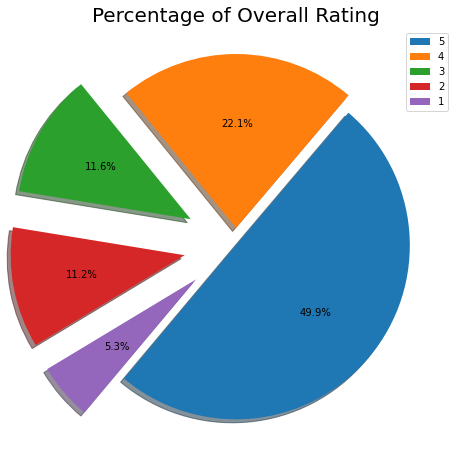

In [26]:
plt.figure(figsize=(8, 8))

explode = [0, 0.1, 0.3, 0.3, 0.3]
plt.pie(df['overall'].value_counts(),explode=explode,autopct='%1.1f%%', shadow=True, startangle=230)
plt.legend(labels=['5', '4', '3', '2', '1'])
plt.title('Percentage of Overall Rating', fontsize=20)
plt.axis('off');

### Pie Chart Graphic of Verified Reviews <a class="anchor" id="2.3"></a>

In [27]:
df["verified"].value_counts()

False    8181
True     5921
Name: verified, dtype: int64

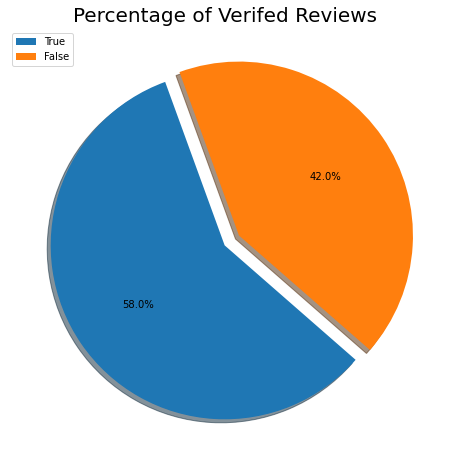

In [28]:
plt.figure(figsize=(8, 8))

explode=[0,0.1]
plt.pie(df['verified'].value_counts(),explode=explode,autopct='%1.1f%%', shadow=True, startangle=110)
plt.legend(labels=['True', 'False'])
plt.title('Percentage of Verifed Reviews', fontsize=20)
plt.axis('off');

In [29]:
df.overall.groupby(df["verified"]).mean()

verified
False    3.681824
True     4.301638
Name: overall, dtype: float64

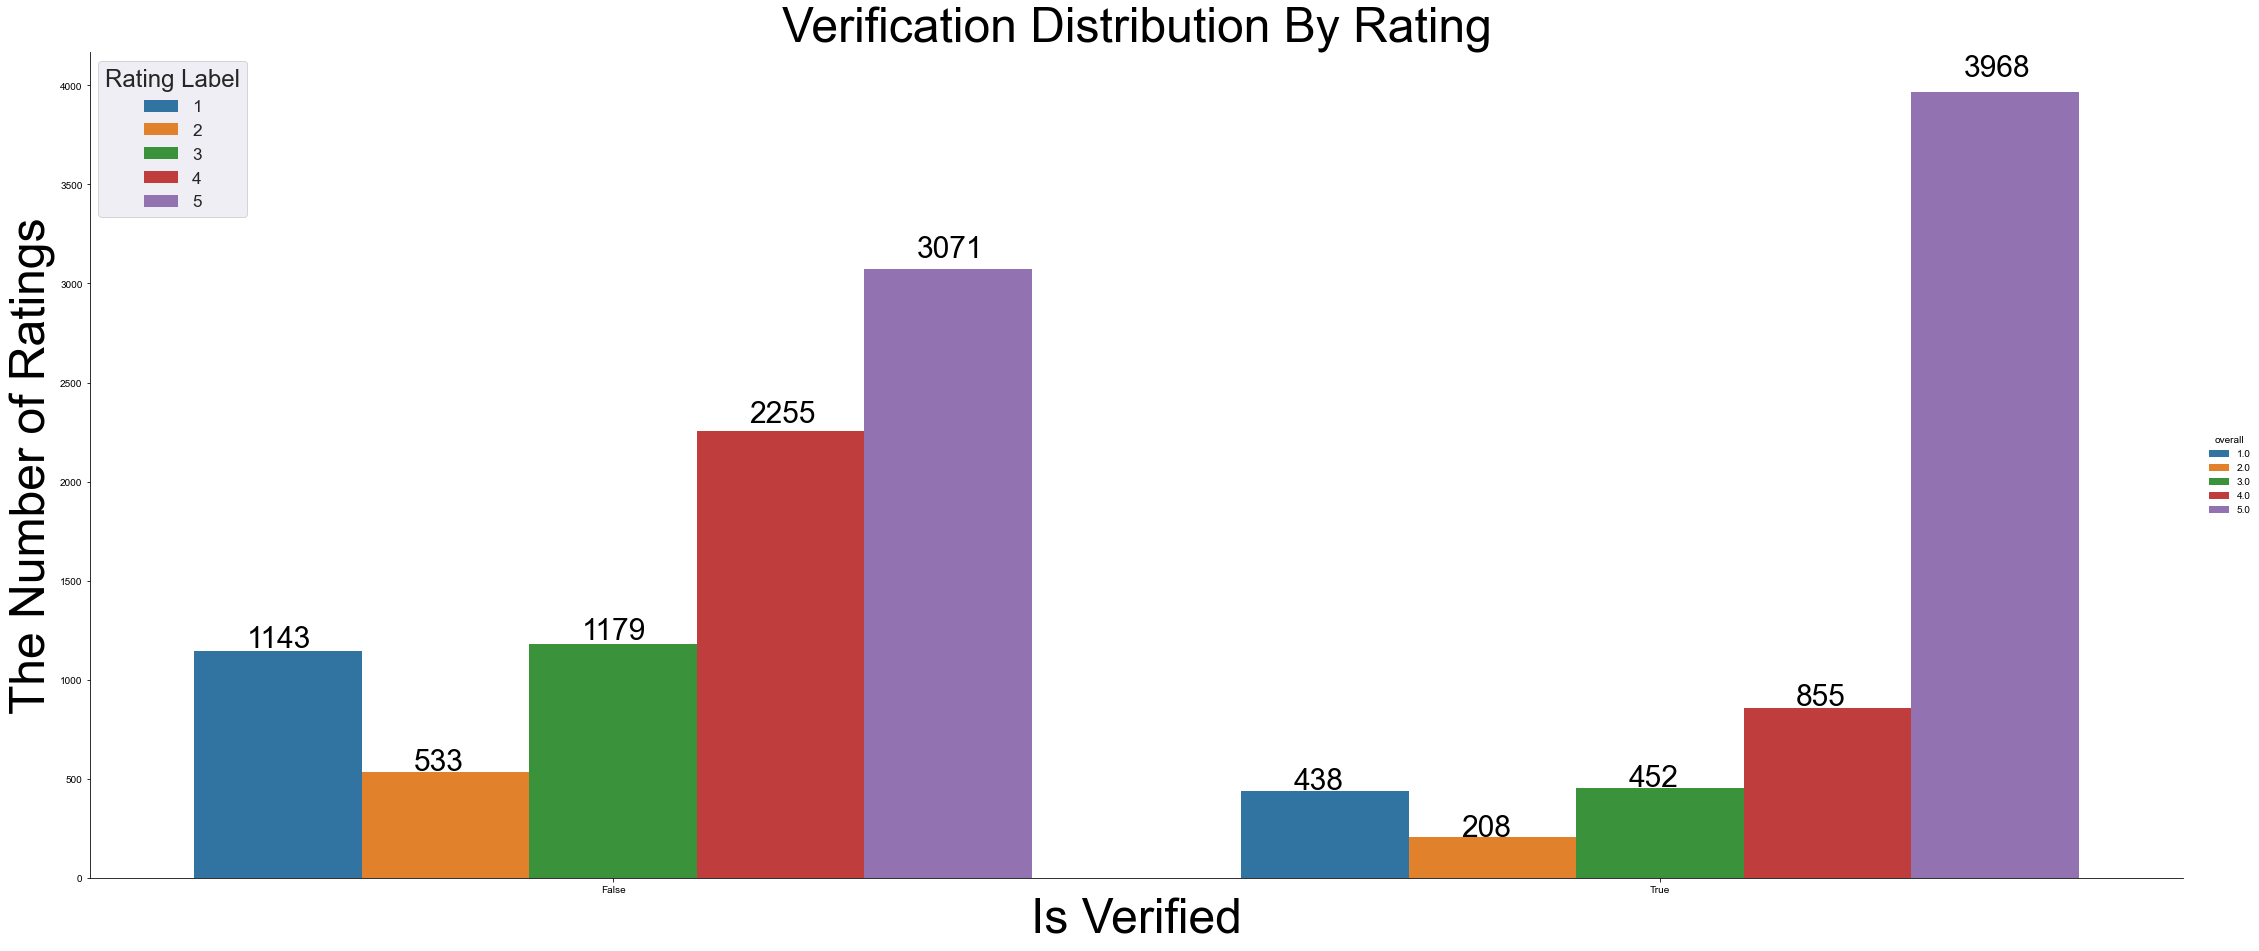

In [30]:

g = sns.catplot(x="verified" ,hue="overall",data=df,kind="count",height=12, aspect=2.5)

sns.set(rc = {'figure.figsize':(30, 20)})
plt.title('Verification Distribution By Rating', fontsize=48)
plt.xlabel("Is Verified", fontsize=48)
plt.ylabel("The Number of Ratings", fontsize=48)
plt.legend(title='Rating Label', loc='upper left', labels=['1', '2', '3', '4', '5'], fontsize='x-large', title_fontsize='24')

ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + 0.05, 
            p.get_height() * 1.020, 
            '{0:.0f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='large', fontsize = 30)

plt.show()


### Analysis of Reviews by Time <a class="anchor" id="2.4"></a>

In [31]:
df["reviewtime"].nunique()

3486

In [32]:
df["reviewtime"] = pd.to_datetime(df["reviewtime"])

In [33]:
df["reviewtime"]

0       2010-10-20
1       2010-10-18
2       2010-10-16
3       2010-10-12
4       2010-10-07
           ...    
14098   2016-07-16
14099   2017-06-17
14100   2017-01-24
14101   2018-06-14
14102   2018-04-16
Name: reviewtime, Length: 14102, dtype: datetime64[ns]

In [34]:
df["day"] = df["reviewtime"].dt.day
df["month"] = df["reviewtime"].dt.month
df["year"] = df["reviewtime"].dt.year

In [35]:
df["year"].value_counts()

2014    2094
2015    1892
2013    1515
2016    1321
2009    1242
2008    1218
2012    1120
2011     920
2010     838
2017     463
2007     401
2018     259
2005     186
2003     148
2002     144
2006     139
2004     132
2001      64
2000       6
Name: year, dtype: int64

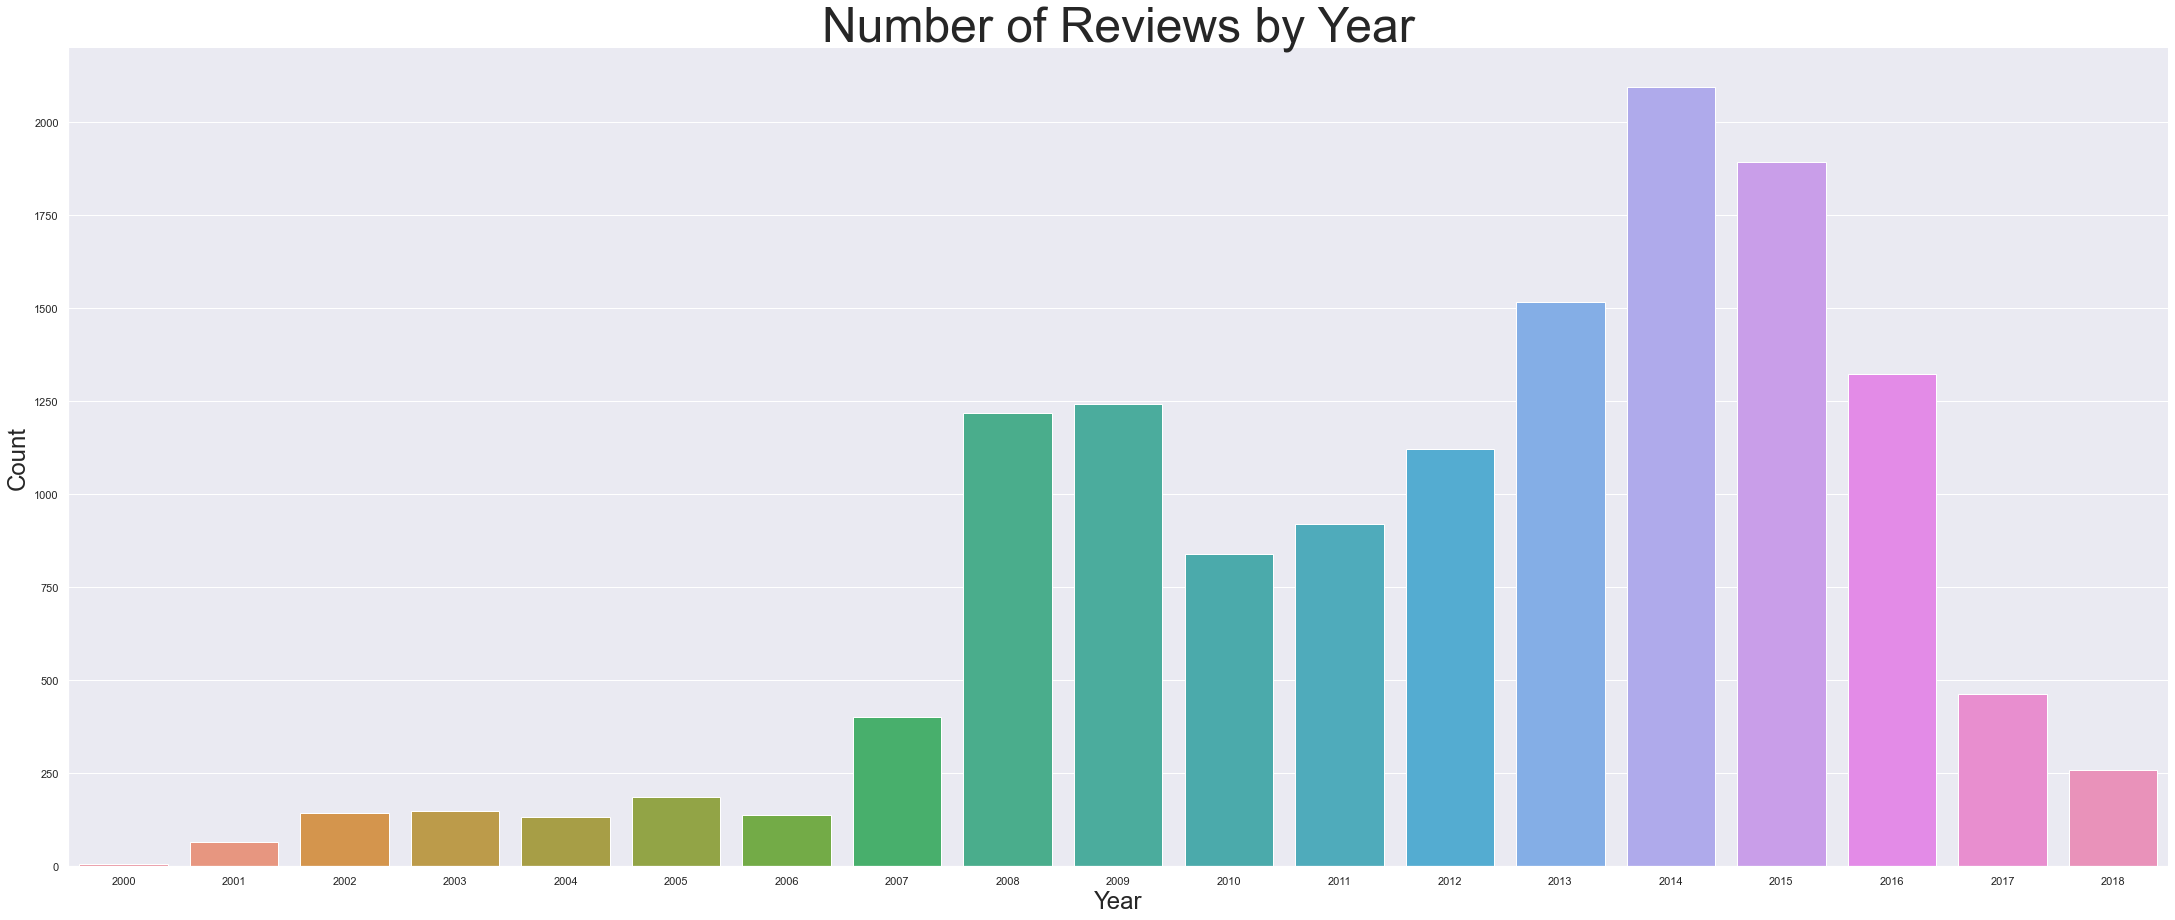

In [36]:
g = sns.catplot(x="year",data=df,kind="count",height=12, aspect=2.5)

sns.set(rc = {'figure.figsize':(30, 20)})
plt.title('Number of Reviews by Year', fontsize=48)
plt.xlabel("Year", fontsize=24)
plt.ylabel("Count", fontsize=24)
plt.show()

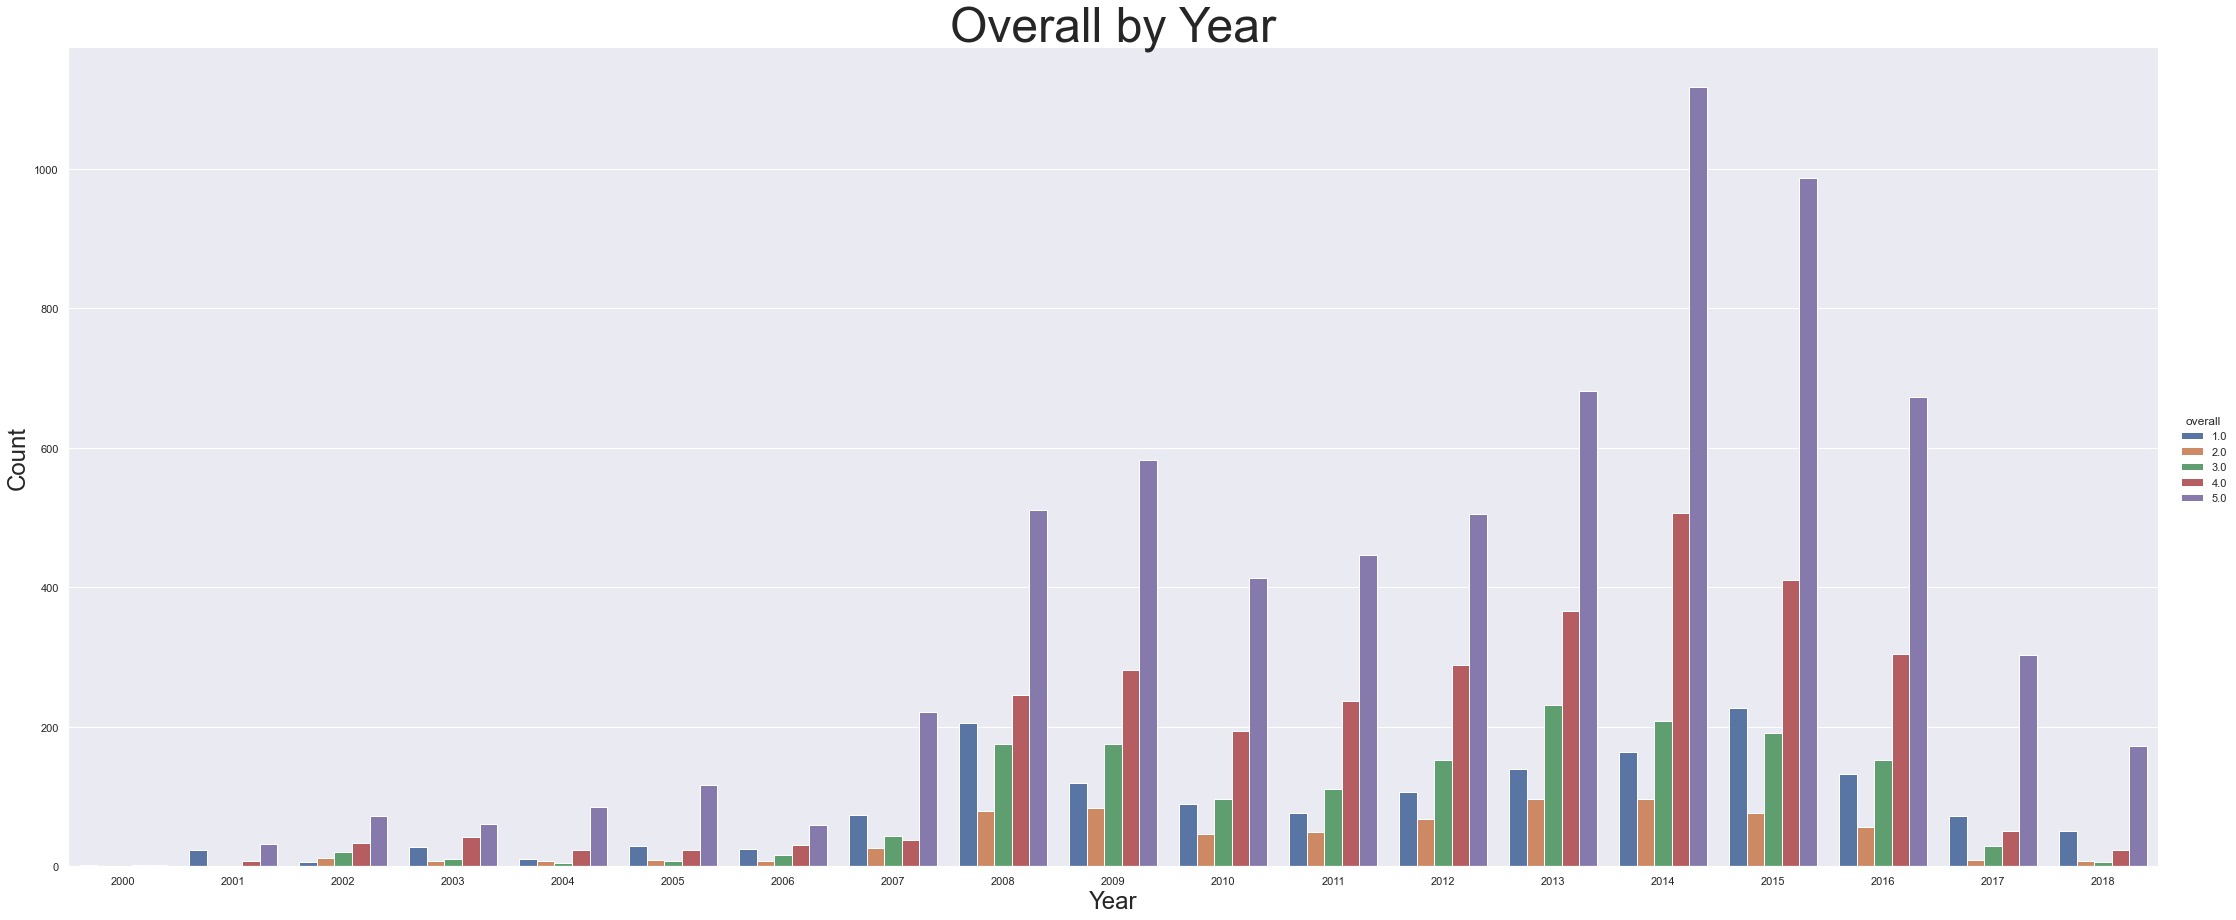

In [37]:
sns.set(rc = {'figure.figsize':(30, 20)})
g = sns.catplot(x="year",hue="overall",data=df,kind="count",height=12, aspect=2.5)


plt.title('Overall by Year', fontsize=48)
plt.xlabel("Year", fontsize=24)
plt.ylabel("Count", fontsize=24)
plt.show()

In [38]:
df["month"].value_counts()

12    1451
1     1427
11    1360
3     1283
4     1271
2     1248
10    1181
5     1080
9     1042
7      939
6      925
8      895
Name: month, dtype: int64

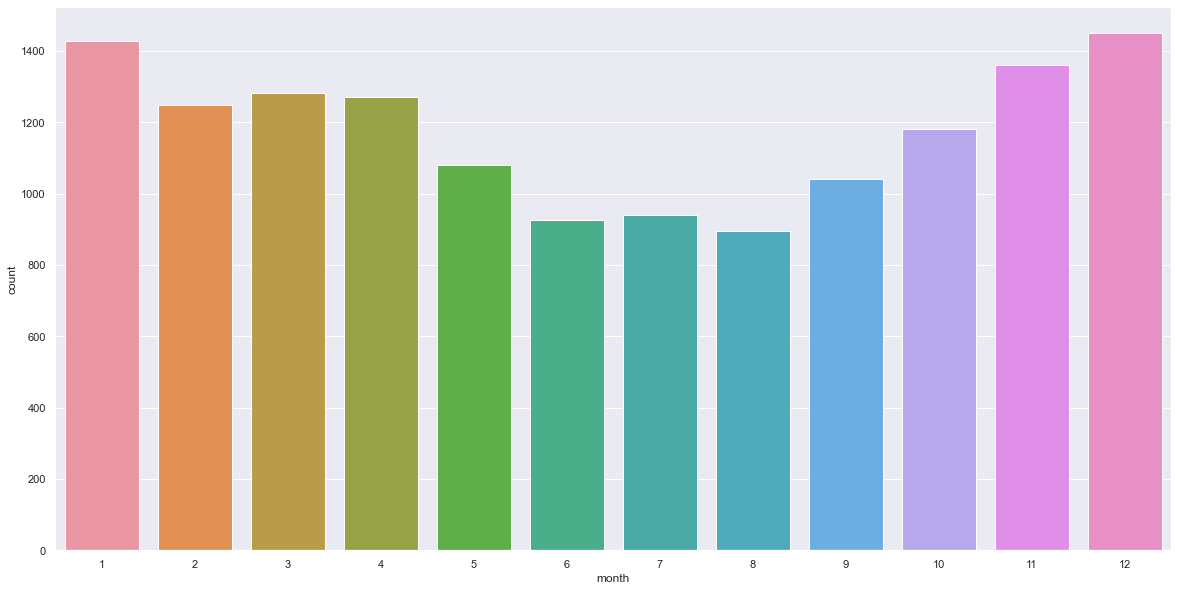

In [39]:
plt.figure(figsize=(20,10))
ax1 = sns.countplot(x="month",data=df)

In [40]:
df.groupby("month")["overall"].mean().sort_values(ascending=False)

month
9     4.092131
6     4.029189
10    4.016088
7     3.982961
12    3.971054
8     3.963128
11    3.951471
3     3.904131
2     3.901442
5     3.863889
1     3.852838
4     3.843430
Name: overall, dtype: float64

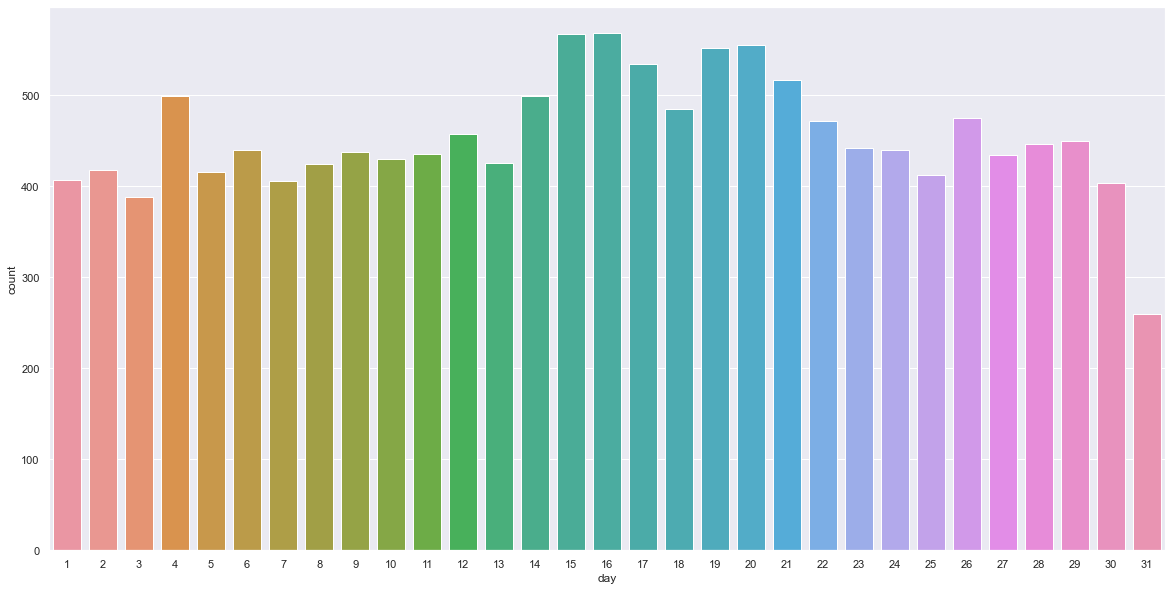

In [42]:
plt.figure(figsize=(20,10))
ax1 = sns.countplot(x="day",data=df)

### Analysis of Reviews ID <a class="anchor" id="2.5"></a>

In [43]:
df['reviewerid'].nunique() # There are 1826 different users

1826

In [44]:
df["reviewername"].nunique() 
# reviewr name should be the same as above.
# there must be more than one user using the same name. 
# It makes more sense to proceed from the reviewer id '

1781

In [45]:
#we can remote it
df.drop(columns=["reviewername"],inplace=True) 

In [46]:
df.groupby("reviewerid")["overall"].mean().sort_values(ascending=False).head(10)
# This does not provide us with clear information.
# Maybe there are users who rate more products more. 

reviewerid
A20PKGHQ0KQPXH    5.0
A25NDDJD0UUALR    5.0
A22XKZH39639H5    5.0
A4EJM72NKO4YM     5.0
A237IXVY43KS0G    5.0
A48400QTCGBJF     5.0
A23BZ2NURE3RNX    5.0
A3VZDMCWFVXOVX    5.0
A3VTJA96JE1J0F    5.0
A23RZ9J7TBGH6C    5.0
Name: overall, dtype: float64

In [47]:
df.groupby("reviewerid")["asin"].count().sort_values(ascending=False).head(100)
# Where asin indicates the product id.
# When the rating in the top 100 is examined, it is seen that each user has 14 or more reviews. 


reviewerid
A225G2TFM76GYX    55
A680RUE1FDO8B     45
A20DZX38KRBIT8    43
A5JLAU2ARJ0BO     34
AQCJWSMSURQI2     31
                  ..
A3MGDZ4LX7CLXW    14
A1EM5LNJBNNI26    14
AE95Z3K6GVIC3     14
A19GSC3QMK694Q    14
A2WB7LZ595CR50    14
Name: asin, Length: 100, dtype: int64

In [48]:
df.loc[df["reviewerid"] == "A225G2TFM76GYX"].groupby("overall")["asin"].count()

overall
1.0     4
2.0     1
3.0     7
4.0    18
5.0    25
Name: asin, dtype: int64

In [49]:
df.loc[df["reviewerid"] == "A680RUE1FDO8B"].groupby("overall")["asin"].count()

overall
1.0     5
2.0     2
3.0    17
4.0     8
5.0    13
Name: asin, dtype: int64

In [50]:
df.loc[df["reviewerid"] == "A20DZX38KRBIT8"].groupby("overall")["asin"].count()

overall
1.0    23
3.0     1
4.0     2
5.0    17
Name: asin, dtype: int64

### Analysis of Software Products ID <a class="anchor" id="2.6" ></a>


In [51]:
df.asin.nunique()

802

In [52]:
df.groupby("asin")["overall"].mean().sort_values(ascending=False).head(10)

asin
B00132DENO    5.0
B00LYYMXF6    5.0
B0013IRKCY    5.0
B0012KW3KM    5.0
B0011SFXCK    5.0
B000ZH8YM4    5.0
B000WY1Q5M    5.0
B000WMQYLA    5.0
B000WEG0H6    5.0
B0014A2LJ8    5.0
Name: overall, dtype: float64

In [53]:
df.asin.value_counts().head(10) 
# Here, we will go through the software products examined.

B0000AZJY6    904
B0001FS9NE    460
B000050ZRE    460
B000EORV8Q    232
B00EZPXYP4     98
B00CTTEKJW     74
B00F8K9MZQ     74
B008H3SW4I     73
B000X86ZAS     72
B00MYXTCGY     64
Name: asin, dtype: int64

In [54]:
df.loc[df["asin"] == "B00132DENO"].groupby("overall").count()

verified  reviewtime  reviewerid  asin  style  reviewtext  summary  \
overall                                                                       
5.0             1           1           1     1      0           1        1   

         unixreviewtime  vote  image  title  day  month  year  
overall                                                        
5.0                   1     0      0      1    1      1     1

In [55]:
df.loc[df["asin"]=="B0000AZJY6"].groupby("overall").count()

verified  reviewtime  reviewerid  asin  style  reviewtext  summary  \
overall                                                                       
1.0            16          16          16    16     16          16       16   
5.0           888         888         888   888    868         888      884   

         unixreviewtime  vote  image  title  day  month  year  
overall                                                        
1.0                  16    16      0     16   16     16    16  
5.0                 888   188      0    888  888    888   888

In [56]:
df.loc[df["asin"] =="B0000AZJY6"].groupby("title").mean()

overall  verified  \
title                                                               
Iogear POWERLINE/HOMEPLUG WALL MOUNT (GHPU21)  4.929204  0.761062   

                                               unixreviewtime        day  \
title                                                                      
Iogear POWERLINE/HOMEPLUG WALL MOUNT (GHPU21)    1.324585e+09  15.707965   

                                                 month         year  
title                                                                
Iogear POWERLINE/HOMEPLUG WALL MOUNT (GHPU21)  6.49115  2011.477876

In [57]:
df_software = pd.DataFrame(columns=["software","Rating","Rating_Avg"])
df_software

Empty DataFrame
Columns: [software, Rating, Rating_Avg]
Index: []

In [58]:
df_top_software = pd.DataFrame(df.asin.value_counts().head(10).index.values,columns=["asin"])

In [60]:
#topsoftware = df.asin.value_counts().head(10).index.values 

In [59]:
df_top_software

asin
0  B0000AZJY6
1  B0001FS9NE
2  B000050ZRE
3  B000EORV8Q
4  B00EZPXYP4
5  B00CTTEKJW
6  B00F8K9MZQ
7  B008H3SW4I
8  B000X86ZAS
9  B00MYXTCGY

In [60]:
df_software = pd.merge(df_top_software, df.groupby("asin")["overall"].mean() , on="asin",how="left")

In [61]:
df_software

asin   overall
0  B0000AZJY6  4.929204
1  B0001FS9NE  4.930435
2  B000050ZRE  4.930435
3  B000EORV8Q  4.931034
4  B00EZPXYP4  4.408163
5  B00CTTEKJW  3.918919
6  B00F8K9MZQ  4.378378
7  B008H3SW4I  2.835616
8  B000X86ZAS  3.388889
9  B00MYXTCGY  3.359375

In [62]:
df_software=pd.merge(df_software, df[["asin","title"]], on="asin",how="left")

In [63]:
df_software

asin   overall                                              title
0     B0000AZJY6  4.929204      Iogear POWERLINE/HOMEPLUG WALL MOUNT (GHPU21)
1     B0000AZJY6  4.929204      Iogear POWERLINE/HOMEPLUG WALL MOUNT (GHPU21)
2     B0000AZJY6  4.929204      Iogear POWERLINE/HOMEPLUG WALL MOUNT (GHPU21)
3     B0000AZJY6  4.929204      Iogear POWERLINE/HOMEPLUG WALL MOUNT (GHPU21)
4     B0000AZJY6  4.929204      Iogear POWERLINE/HOMEPLUG WALL MOUNT (GHPU21)
...          ...       ...                                                ...
2506  B00MYXTCGY  3.359375  TurboTax Deluxe 2014 Fed + State + Fed Efile T...
2507  B00MYXTCGY  3.359375  TurboTax Deluxe 2014 Fed + State + Fed Efile T...
2508  B00MYXTCGY  3.359375  TurboTax Deluxe 2014 Fed + State + Fed Efile T...
2509  B00MYXTCGY  3.359375  TurboTax Deluxe 2014 Fed + State + Fed Efile T...
2510  B00MYXTCGY  3.359375  TurboTax Deluxe 2014 Fed + State + Fed Efile T...

[2511 rows x 3 columns]

In [64]:
df_software = df_software.drop_duplicates(subset=['asin', 'overall','title'], keep='last').reset_index()

In [65]:
df_software

index        asin   overall  \
0    903  B0000AZJY6  4.929204   
1   1363  B0001FS9NE  4.930435   
2   1823  B000050ZRE  4.930435   
3   2055  B000EORV8Q  4.931034   
4   2153  B00EZPXYP4  4.408163   
5   2227  B00CTTEKJW  3.918919   
6   2301  B00F8K9MZQ  4.378378   
7   2374  B008H3SW4I  2.835616   
8   2446  B000X86ZAS  3.388889   
9   2510  B00MYXTCGY  3.359375   

                                               title  
0      Iogear POWERLINE/HOMEPLUG WALL MOUNT (GHPU21)  
1  Sony VAIO 802.11a/b/g Ethernet Converter (PCWA...  
2           Key Span 4-Port USB Hub - White (UH-4WH)  
3           Irocks Red USB 2.0 Illuminated 4PORT Hub  
4                      NORTON 360 21.0 EN 1U 3LIC MM  
5                       Amazon Music [PC] [Download]  
6  TurboTax Deluxe Fed + Efile + State 2013 OLD V...  
7    Microsoft Windows 8 Pro - Upgrade [Old Version]  
8  Microsoft Office 2008 for Mac Home &amp; Stude...  
9  TurboTax Deluxe 2014 Fed + State + Fed Efile T...

In [66]:
df_software = pd.merge(df_software, df.groupby("asin").count() , on="asin",how="left")

In [67]:
df_software 

index        asin  overall_x  \
0    903  B0000AZJY6   4.929204   
1   1363  B0001FS9NE   4.930435   
2   1823  B000050ZRE   4.930435   
3   2055  B000EORV8Q   4.931034   
4   2153  B00EZPXYP4   4.408163   
5   2227  B00CTTEKJW   3.918919   
6   2301  B00F8K9MZQ   4.378378   
7   2374  B008H3SW4I   2.835616   
8   2446  B000X86ZAS   3.388889   
9   2510  B00MYXTCGY   3.359375   

                                             title_x  overall_y  verified  \
0      Iogear POWERLINE/HOMEPLUG WALL MOUNT (GHPU21)        904       904   
1  Sony VAIO 802.11a/b/g Ethernet Converter (PCWA...        460       460   
2           Key Span 4-Port USB Hub - White (UH-4WH)        460       460   
3           Irocks Red USB 2.0 Illuminated 4PORT Hub        232       232   
4                      NORTON 360 21.0 EN 1U 3LIC MM         98        98   
5                       Amazon Music [PC] [Download]         74        74   
6  TurboTax Deluxe Fed + Efile + State 2013 OLD V...         74        74   
7    Microsoft Windows 8 Pro - Upgrade [Old Version]         73        73   
8  Microsoft Office 2008 for Mac Home &amp; Stude...         72        72   
9  TurboTax Deluxe 2014 Fed + State + Fed Efile T...         64        64   

   reviewtime  reviewerid  style  reviewtext  summary  unixreviewtime  vote  \
0         904         904    884         904      900             904   204   
1         460         460      0         460      458             460     0   
2         460         460    442         460      458             460    98   
3         232         232      0         232      231             232     0   
4          98          98     98          98       98              98     7   
5          74          74     74          74       74              74     2   
6          74          74     74          74       74              74     7   
7          73          73     68          73       73              73    58   
8          72          72      0          72       72              72    34   
9          64          64     64          64       64              64    30   

   image  title_y  day  month  year  
0      0      904  904    904   904  
1      0      460  460    460   460  
2      0      460  460    460   460  
3      0      232  232    232   232  
4      0       98   98     98    98  
5      1       74   74     74    74  
6      0       74   74     74    74  
7      0       73   73     73    73  
8      0       72   72     72    72  
9      0       64   64     64    64

In [68]:
df_final = df_software[["title_x","overall_y","overall_x"]]

In [69]:
df_final = df_final.rename(columns={"title_x":"Software","overall_y":"Rating","overall_x":"Rating Average"})

In [70]:
df_final

Software  Rating  Rating Average
0      Iogear POWERLINE/HOMEPLUG WALL MOUNT (GHPU21)     904        4.929204
1  Sony VAIO 802.11a/b/g Ethernet Converter (PCWA...     460        4.930435
2           Key Span 4-Port USB Hub - White (UH-4WH)     460        4.930435
3           Irocks Red USB 2.0 Illuminated 4PORT Hub     232        4.931034
4                      NORTON 360 21.0 EN 1U 3LIC MM      98        4.408163
5                       Amazon Music [PC] [Download]      74        3.918919
6  TurboTax Deluxe Fed + Efile + State 2013 OLD V...      74        4.378378
7    Microsoft Windows 8 Pro - Upgrade [Old Version]      73        2.835616
8  Microsoft Office 2008 for Mac Home &amp; Stude...      72        3.388889
9  TurboTax Deluxe 2014 Fed + State + Fed Efile T...      64        3.359375

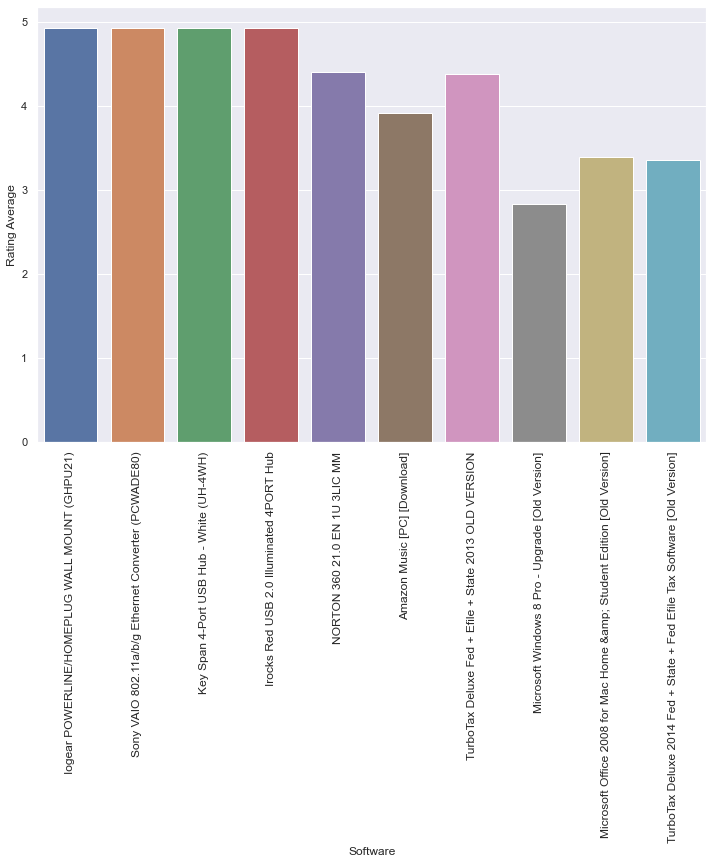

In [71]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="Software", y="Rating Average", data=df_final)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, size=12)
plt.show()

[Text(0, 0, 'Iogear POWERLINE/HOMEPLUG WALL MOUNT (GHPU21)'),
 Text(1, 0, 'Sony VAIO 802.11a/b/g Ethernet Converter (PCWADE80)'),
 Text(2, 0, 'Key Span 4-Port USB Hub - White (UH-4WH)'),
 Text(3, 0, 'Irocks Red USB 2.0 Illuminated 4PORT Hub'),
 Text(4, 0, 'NORTON 360 21.0 EN 1U 3LIC MM'),
 Text(5, 0, 'Amazon Music [PC] [Download]'),
 Text(6, 0, 'TurboTax Deluxe Fed + Efile + State 2013 OLD VERSION'),
 Text(7, 0, 'Microsoft Windows 8 Pro - Upgrade [Old Version]'),
 Text(8, 0, 'Microsoft Office 2008 for Mac Home &amp; Student Edition [Old Version]'),
 Text(9, 0, 'TurboTax Deluxe 2014 Fed + State + Fed Efile Tax Software [Old Version]')]

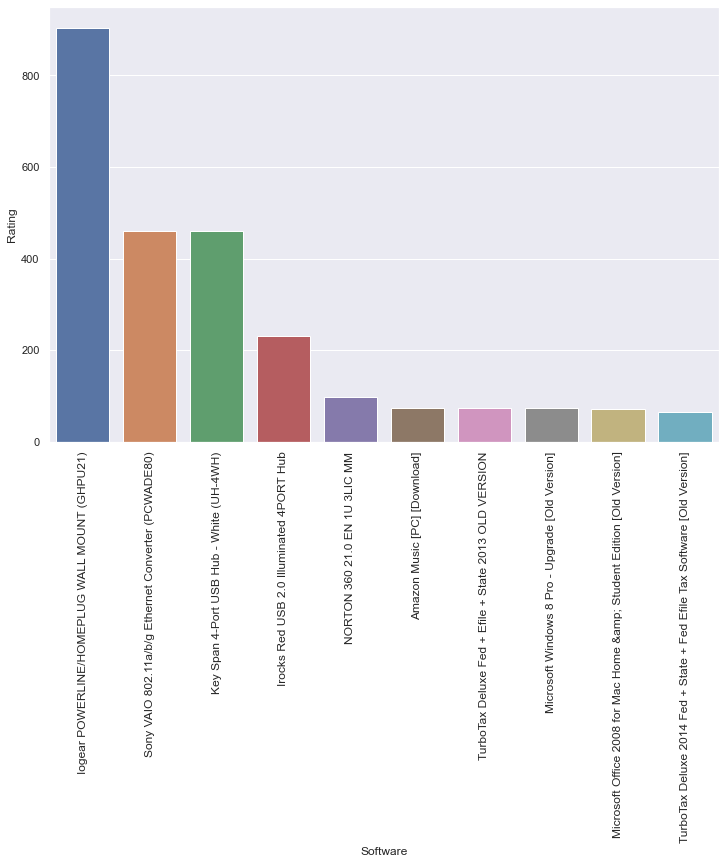

In [72]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="Software", y="Rating", data=df_final)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, size=12)

In [73]:
df["title"].value_counts().head(10)

Iogear POWERLINE/HOMEPLUG WALL MOUNT (GHPU21)                                                           904
Sony VAIO 802.11a/b/g Ethernet Converter (PCWADE80)                                                     460
Key Span 4-Port USB Hub - White (UH-4WH)                                                                460
Irocks Red USB 2.0 Illuminated 4PORT Hub                                                                232
TurboTax Deluxe Fed + Efile + State 2013 OLD VERSION                                                    110
NORTON 360 21.0 EN 1U 3LIC MM                                                                            98
Amazon Music [PC] [Download]                                                                             74
Microsoft Windows 8 Pro - Upgrade [Old Version]                                                          73
Microsoft Office 2008 for Mac Home &amp; Student Edition [Old Version]                                   72
Norton Security Deluxe &ndas

In [74]:
df["summary"].nunique()

9309

In [75]:
df["reviewtext"][0]

"I've been using Dreamweaver (and it's predecessor Macromedia's UltraDev) for many years.  For someone who is an experienced web designer, this course is a high-level review of the CS5 version of Dreamweaver, but it doesn't go into a great enough level of detail to find it very useful.\n\nOn the other hand, this is a great tool for someone who is a relative novice at web design.  It starts off with a basic overview of HTML and continues through the concepts necessary to build a modern web site.  Someone who goes through this course should exit with enough knowledge to create something that does what you want it do do...within reason.  Don't expect to go off and build an entire e-commerce system with only this class under your belt.\n\nIt's important to note that there's a long gap from site design to actual implementation.  This course teaches you how to implement a design.  The user interface and overall user experience is a different subject that isn't covered here...it's possible to

In [76]:
df["summary"][0]

'A solid overview of Dreamweaver CS5'

In [77]:
df["image"].value_counts().head()

['https://images-na.ssl-images-amazon.com/images/I/41TfC2-N0CL._SY88.jpg']                                                                                                                                                        5
['https://images-na.ssl-images-amazon.com/images/I/61eQHxiUrzL._SY88.jpg']                                                                                                                                                        2
['https://images-na.ssl-images-amazon.com/images/I/31yAmAM8VwL._SY88.jpg']                                                                                                                                                        2
['https://images-na.ssl-images-amazon.com/images/I/71lCnCveEpL._SY88.png', 'https://images-na.ssl-images-amazon.com/images/I/71GCY+dwtZL._SY88.png', 'https://images-na.ssl-images-amazon.com/images/I/61TCmO5NjJL._SY88.png']    2
['https://images-na.ssl-images-amazon.com/images/I/41UZLAFQPSL._SY88.jpg']              

In [78]:
df["vote"].value_counts().head()

2    1118
3     640
4     404
5     296
6     224
Name: vote, dtype: int64

In [80]:
df.drop(columns=["image","vote"],inplace=True)

In [81]:
df.drop(columns=["unixreviewtime"],inplace=True)

## Text Mining <a class="anchor" id="3"></a>

### Analysis of Positive, Negative and Neutral Reviews <a class="anchor" id="3.1"></a>

In [82]:
df["overall"] = df["overall"].apply(np.int64)
#float to integer

In [83]:
df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14102 entries, 0 to 14102
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   overall     14102 non-null  int64         
 1   verified    14102 non-null  bool          
 2   reviewtime  14102 non-null  datetime64[ns]
 3   reviewerid  14102 non-null  object        
 4   asin        14102 non-null  object        
 5   style       7934 non-null   object        
 6   reviewtext  14102 non-null  object        
 7   summary     14091 non-null  object        
 8   title       14102 non-null  object        
 9   day         14102 non-null  int64         
 10  month       14102 non-null  int64         
 11  year        14102 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(4), object(6)
memory usage: 1.8+ MB


In [84]:
df["sentiment"]=df["overall"].map(lambda 
                           x : 2 if x == 5 or x == 4 else(1 if (x == 1 or x == 2) else 0))  

In [85]:
df.groupby(["sentiment","overall"]).count()

verified  reviewtime  reviewerid  asin  style  reviewtext  \
sentiment overall                                                              
0         3            1631        1631        1631  1631    799        1631   
1         1            1581        1581        1581  1581    757        1581   
          2             741         741         741   741    373         741   
2         4            3110        3110        3110  3110   1734        3110   
          5            7039        7039        7039  7039   4271        7039   

                   summary  title   day  month  year  
sentiment overall                                     
0         3           1631   1631  1631   1631  1631  
1         1           1581   1581  1581   1581  1581  
          2            741    741   741    741   741  
2         4           3108   3110  3110   3110  3110  
          5           7030   7039  7039   7039  7039

In [86]:
df.sentiment.value_counts()

2    10149
1     2322
0     1631
Name: sentiment, dtype: int64

In [87]:
df["reviewtext"] = df["reviewtext"].str.lower()

In [88]:
df["reviewtext"]

0        i've been using dreamweaver (and it's predeces...
1        the demo is done with the pc version, with ref...
2        if you've been wanting to learn how to create ...
3        i've been creating websites with dreamweaver f...
4        i decided (after trying a number of other prod...
                               ...                        
14098    when i ordered this it was listed as photo edi...
14099    this software has so much going on.  theres a ...
14100    i have used both more complex and less complex...
14101    pinnacle studio 20 ultimate is a perfectly ser...
14102    a program that is fairly easy to use and provi...
Name: reviewtext, Length: 14102, dtype: object

In [89]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [90]:
def remove_punctuation(text):
    text_without_punc = "".join([i.replace("\n"," ") for i in text if i not in string.punctuation])
    return text_without_punc

In [91]:
df["clean_review"] = df["reviewtext"].apply(lambda x: remove_punctuation(x))
df.head()

overall  verified reviewtime      reviewerid        asin  \
0        4     False 2010-10-20  A38NELQT98S4H8  0321719816   
1        4     False 2010-10-18  A3QJU4FEN8PQSZ  0321719816   
2        5     False 2010-10-16   ACJT8MUC0LRF0  0321719816   
3        5     False 2010-10-12   AYUF7YETYOLNX  0321719816   
4        5     False 2010-10-07  A31ICLWQ9CSHRS  0321719816   

                     style                                         reviewtext  \
0  {'Format:': ' DVD-ROM'}  i've been using dreamweaver (and it's predeces...   
1  {'Format:': ' DVD-ROM'}  the demo is done with the pc version, with ref...   
2  {'Format:': ' DVD-ROM'}  if you've been wanting to learn how to create ...   
3  {'Format:': ' DVD-ROM'}  i've been creating websites with dreamweaver f...   
4  {'Format:': ' DVD-ROM'}  i decided (after trying a number of other prod...   

                                             summary  \
0                A solid overview of Dreamweaver CS5   
1                                       A good value   
2  This is excellent software for those who want ...   
3  A Fantastic Overview of Dream Weaver and Web D...   
4                               Excellent Tutorials!   

                                               title  day  month  year  \
0  Learn Adobe Dreamweaver CS5 by Video: Core Tra...   20     10  2010   
1  Learn Adobe Dreamweaver CS5 by Video: Core Tra...   18     10  2010   
2  Learn Adobe Dreamweaver CS5 by Video: Core Tra...   16     10  2010   
3  Learn Adobe Dreamweaver CS5 by Video: Core Tra...   12     10  2010   
4  Learn Adobe Dreamweaver CS5 by Video: Core Tra...    7     10  2010   

   sentiment                                       clean_review  
0          2  ive been using dreamweaver and its predecessor...  
1          2  the demo is done with the pc version with refe...  
2          2  if youve been wanting to learn how to create y...  
3          2  ive been creating websites with dreamweaver fo...  
4          2  i decided after trying a number of other produ...

In [92]:
df["clean_review"][0]

'ive been using dreamweaver and its predecessor macromedias ultradev for many years  for someone who is an experienced web designer this course is a highlevel review of the cs5 version of dreamweaver but it doesnt go into a great enough level of detail to find it very useful  on the other hand this is a great tool for someone who is a relative novice at web design  it starts off with a basic overview of html and continues through the concepts necessary to build a modern web site  someone who goes through this course should exit with enough knowledge to create something that does what you want it do dowithin reason  dont expect to go off and build an entire ecommerce system with only this class under your belt  its important to note that theres a long gap from site design to actual implementation  this course teaches you how to implement a design  the user interface and overall user experience is a different subject that isnt covered hereits possible to do a great implementation of an a

In [93]:
df_positive = df.loc[df["sentiment"]==2]

In [94]:
df_negative = df.loc[df["sentiment"]==1]

In [95]:
df_neutral = df.loc[df["sentiment"]==0]

### Word Cloud <a class="anchor" id="3.2"></a>

In [ ]:
#!pip install wordcloud
#Word Cloud is a data visualization technique used for representing text data in which the size of 
#each word indicates its frequency or importance. 
#Word clouds are widely used for analyzing data from social network websites. 

In [97]:
stop_words = set(STOPWORDS)
#The term “stop word” refers to the most common words in a language.

In [98]:
wordcloud = WordCloud(background_color="white",stopwords=stop_words,
                      max_words=500, max_font_size =100, random_state=42, width=800, height=400)

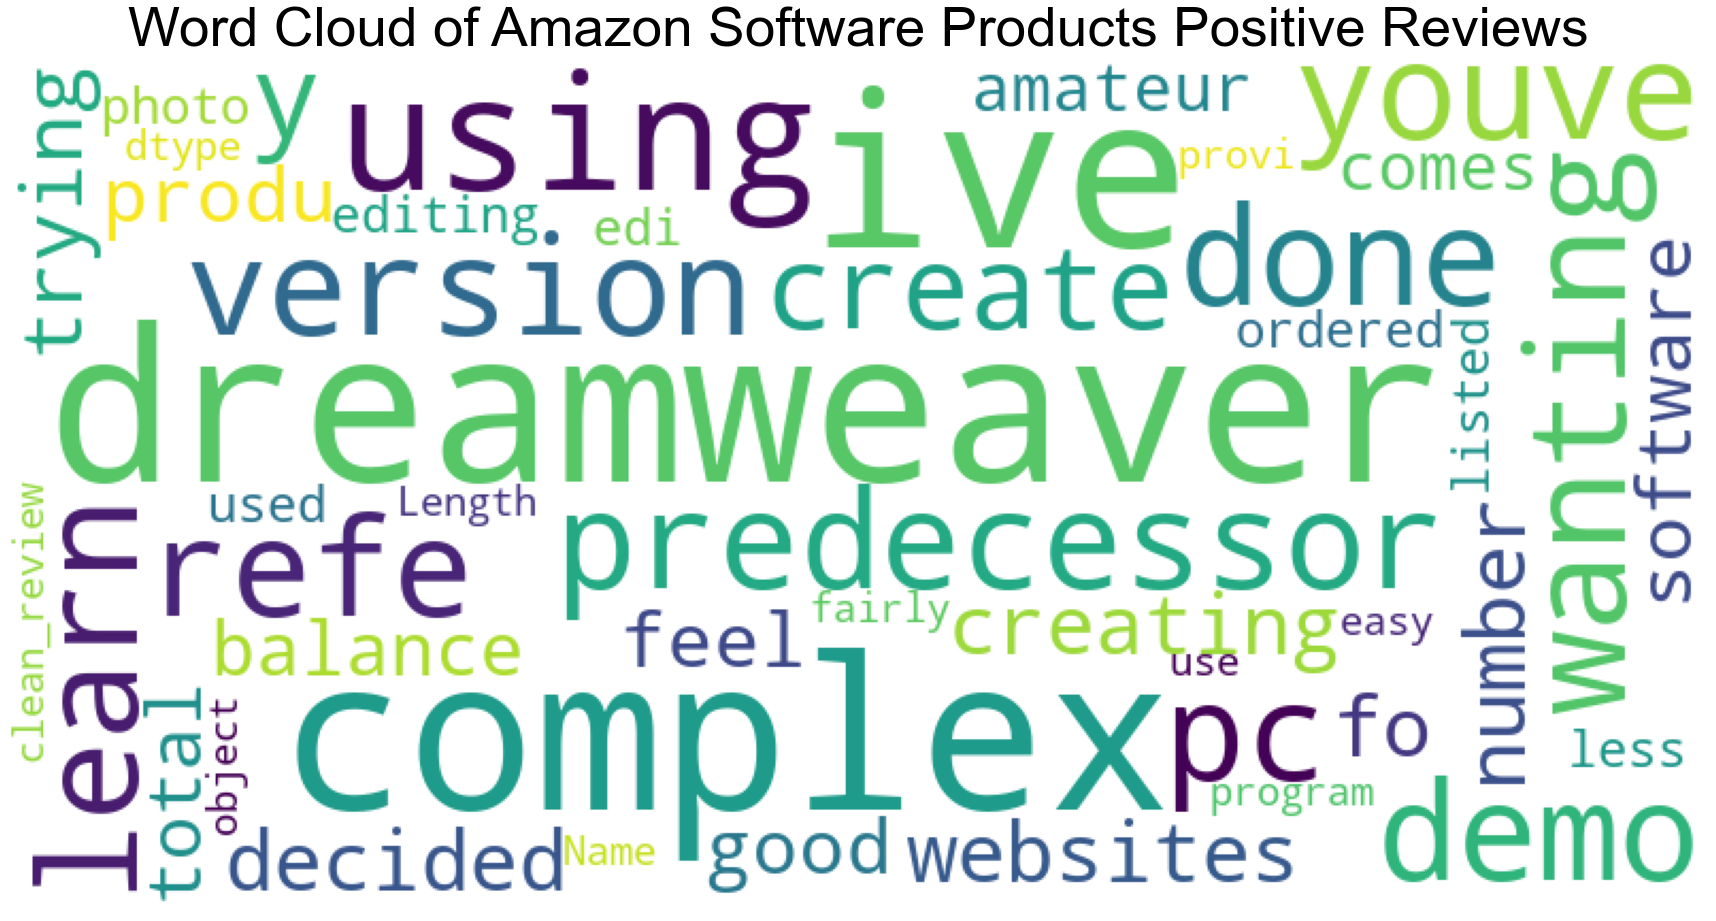

In [99]:
wordcloud.generate(str(df_positive["clean_review"]))
plt.figure(figsize = (24,16))
plt.imshow(wordcloud)
plt.title(f'Word Cloud of Amazon Software Products Positive Reviews', fontdict= {"size":55,"color":"black",
                                                                                "verticalalignment":"bottom"})
plt.axis('off');
plt.tight_layout()  

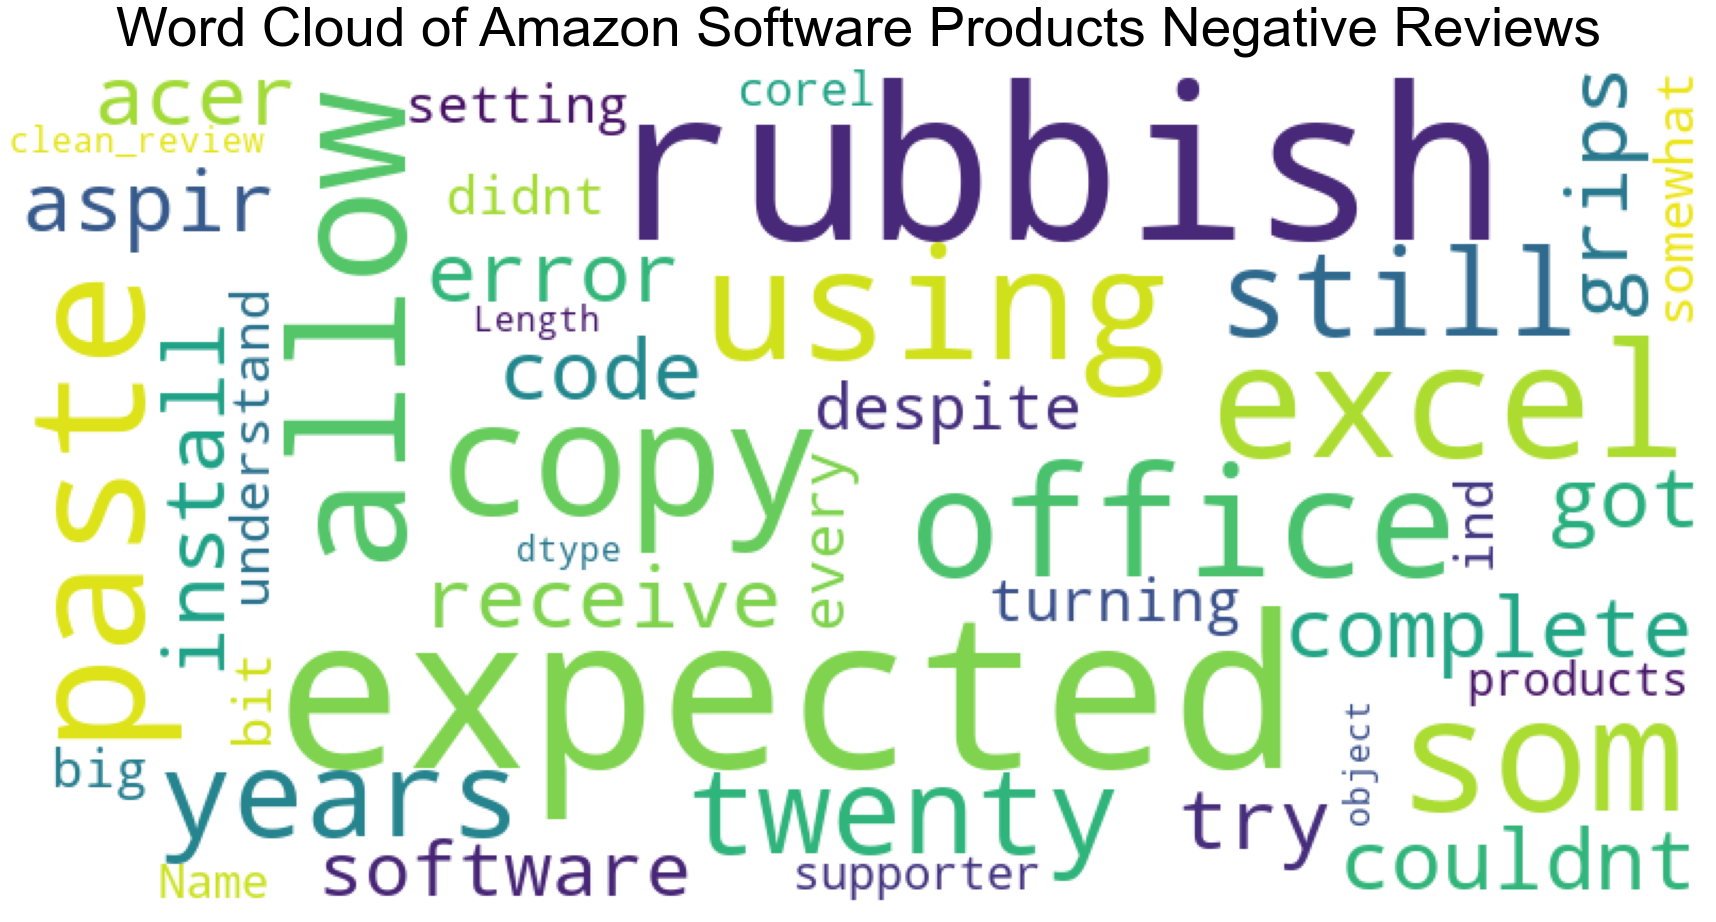

In [100]:
wordcloud.generate(str(df_negative["clean_review"]))
plt.figure(figsize = (24,16))
plt.imshow(wordcloud)
plt.title(f'Word Cloud of Amazon Software Products Negative Reviews', fontdict= {"size":55,"color":"black",
                                                                                "verticalalignment":"bottom"})
plt.axis('off');
plt.tight_layout()  

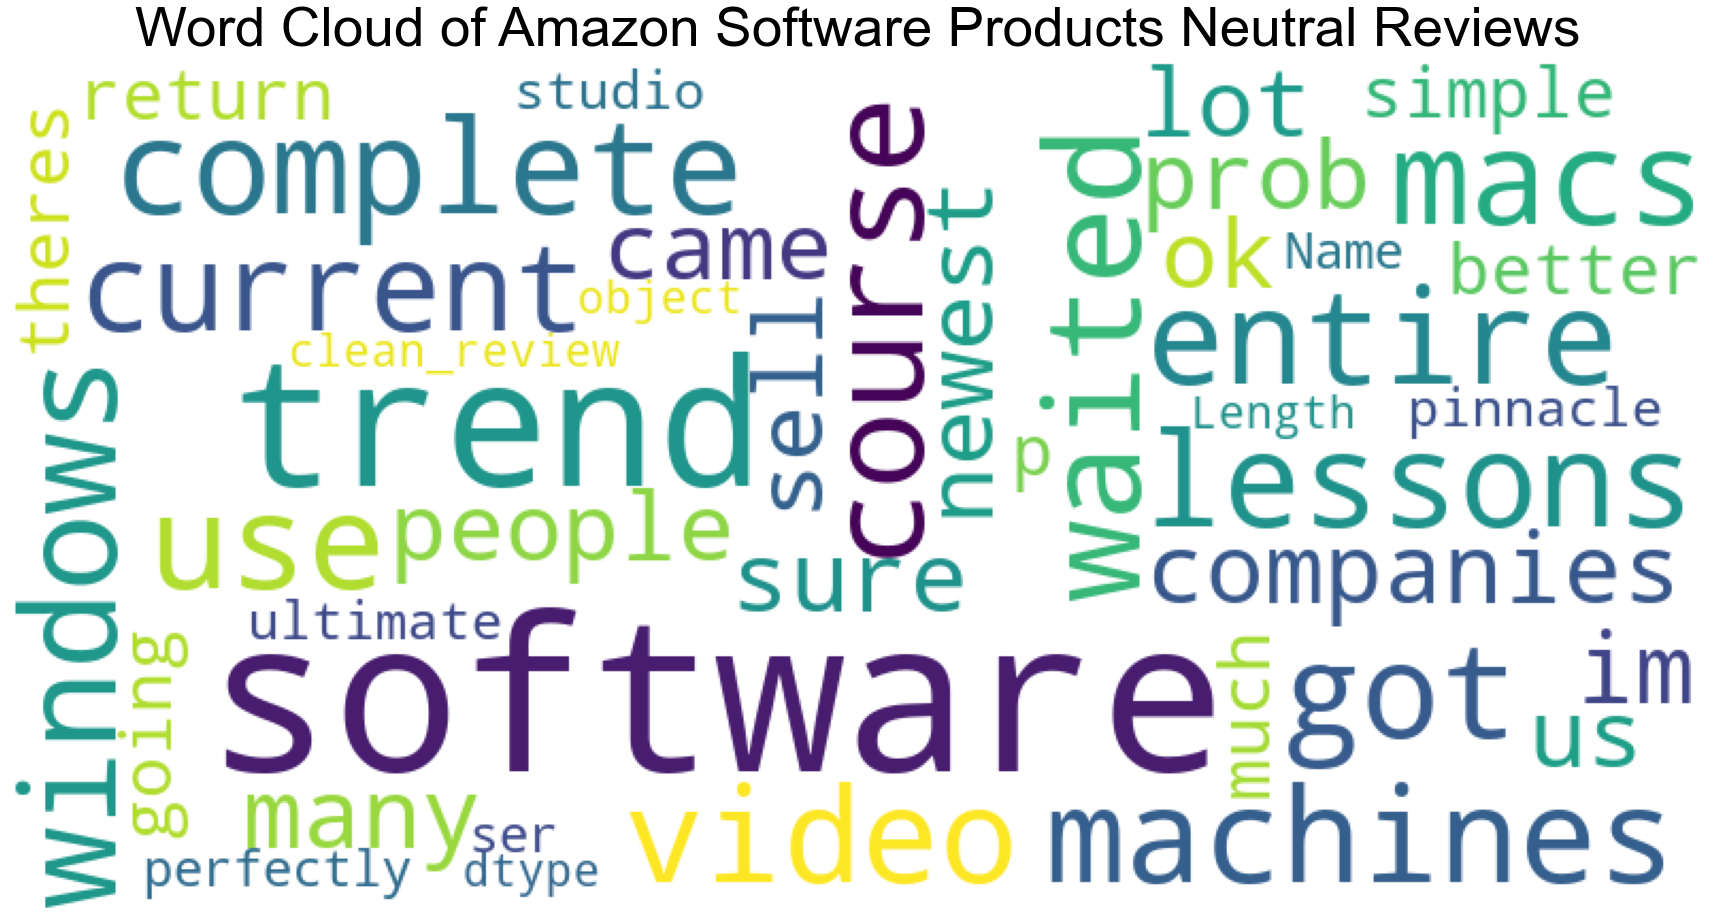

In [101]:
wordcloud.generate(str(df_neutral["clean_review"]))
plt.figure(figsize = (24,16))
plt.imshow(wordcloud)
plt.title(f'Word Cloud of Amazon Software Products Neutral Reviews', fontdict= {"size":55,"color":"black",
                                                                                "verticalalignment":"bottom"})
plt.axis('off');
plt.tight_layout()  

In [121]:
df.to_csv("cleaned_data.csv", index = False)

## Binary Classification <a class="anchor" id="4"></a>

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,balanced_accuracy_score
from sklearn.model_selection import train_test_split

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

from sklearn.metrics import confusion_matrix,accuracy_score, recall_score, precision_score, f1_score, roc_auc_score,classification_report
from sklearn.model_selection import cross_val_score, cross_validate

from sklearn.model_selection import GridSearchCV


In [123]:
df = pd.read_csv("cleaned_data.csv",low_memory=False)

In [124]:
df.head()

overall  verified  reviewtime      reviewerid        asin  \
0        4     False  2010-10-20  A38NELQT98S4H8  0321719816   
1        4     False  2010-10-18  A3QJU4FEN8PQSZ  0321719816   
2        5     False  2010-10-16   ACJT8MUC0LRF0  0321719816   
3        5     False  2010-10-12   AYUF7YETYOLNX  0321719816   
4        5     False  2010-10-07  A31ICLWQ9CSHRS  0321719816   

                     style                                         reviewtext  \
0  {'Format:': ' DVD-ROM'}  i've been using dreamweaver (and it's predeces...   
1  {'Format:': ' DVD-ROM'}  the demo is done with the pc version, with ref...   
2  {'Format:': ' DVD-ROM'}  if you've been wanting to learn how to create ...   
3  {'Format:': ' DVD-ROM'}  i've been creating websites with dreamweaver f...   
4  {'Format:': ' DVD-ROM'}  i decided (after trying a number of other prod...   

                                             summary  \
0                A solid overview of Dreamweaver CS5   
1                                       A good value   
2  This is excellent software for those who want ...   
3  A Fantastic Overview of Dream Weaver and Web D...   
4                               Excellent Tutorials!   

                                               title  day  month  year  \
0  Learn Adobe Dreamweaver CS5 by Video: Core Tra...   20     10  2010   
1  Learn Adobe Dreamweaver CS5 by Video: Core Tra...   18     10  2010   
2  Learn Adobe Dreamweaver CS5 by Video: Core Tra...   16     10  2010   
3  Learn Adobe Dreamweaver CS5 by Video: Core Tra...   12     10  2010   
4  Learn Adobe Dreamweaver CS5 by Video: Core Tra...    7     10  2010   

   sentiment                                       clean_review  
0          2  ive been using dreamweaver and its predecessor...  
1          2  the demo is done with the pc version with refe...  
2          2  if youve been wanting to learn how to create y...  
3          2  ive been creating websites with dreamweaver fo...  
4          2  i decided after trying a number of other produ...

In [125]:
df.isna().sum()

overall            0
verified           0
reviewtime         0
reviewerid         0
asin               0
style           6168
reviewtext         0
summary           11
title              0
day                0
month              0
year               0
sentiment          0
clean_review       2
dtype: int64

In [127]:
#df["sentiment"]=df["overall"].map(lambda 
                           #x : 2 if x == 5 or x == 4 else(1 if (x == 1 or x == 2) else 0))  

In [126]:
def binary_sentiment(overall):
    if overall >= 3:
        return 1 
    else:
        return 0

In [127]:
df["sentiment"] = df["overall"].apply(binary_sentiment)

In [128]:
df["sentiment"].value_counts()

1    11780
0     2322
Name: sentiment, dtype: int64

In [129]:
df_0 = df.loc[df.sentiment == 0].head(2300)
df_1 = df.loc[df.sentiment == 1].head(2300)

In [130]:
frames = [df_0, df_1]
df_sampled = pd.concat(frames)

In [131]:
df_sampled.sentiment.value_counts()

0    2300
1    2300
Name: sentiment, dtype: int64

In [133]:
df_sampled.dropna(subset=["clean_review"],inplace=True)

In [134]:
def preprocess_text(text):
    import re
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    return text

In [135]:
def model_train_test_split(df):
    X_train,X_test, y_train, y_test = train_test_split(df["clean_review"],df["sentiment"], test_size=0.2, random_state=42)
    
    print(X_train.shape)
    print(X_test.shape)
    
    
    #TF-IDF is better than Count Vectorizers because it not only focuses 
    #on the frequency of words present in the corpus but also provides the importance of the words.
    word_vectorizer = TfidfVectorizer(sublinear_tf=True, #scaling
                                      preprocessor=preprocess_text,
                                      strip_accents="unicode",
                                      #Unicode is a standard encoding system that is used to 
                                      #represent characters from almost all languages
                                      token_pattern=r'\w{1,}',
                                      stop_words="english",
                                      ngram_range = (1,1)
                                      #unigram, 
                                      max_features=10000)
                                      #max_feature: most frequently to be in its’ vocabulary
                                      #and drop everything else.  
                                      
    
    word_vectorizer.fit(df["clean_review"])
    
    
    
    X_train_vectorizer = word_vectorizer.transform(X_train)
    X_test_vectorizer = word_vectorizer.transform(X_test)

    
    
    print(f'X_train : {X_train}')
    print(f'\n\nX_train_tdif_vectorizer: {X_train_vectorizer.shape}')
    print(f'\n\nX_train_tdif_vectorizer.toarray(): \n\n{X_train_vectorizer.toarray()}')
    print("\n\n------------------------------------\n\n")
    print(f'X_test_tdif_vectorizer.toarray(): \n\n{X_test_vectorizer.toarray()}')
    print("\n\n------------------------------------\n\n")
    print(f'vectorizer.get_feature_names(): \n\n{word_vectorizer.get_feature_names()}')
    print("\n\n------------------------------------\n\n")
    print(pd.DataFrame(X_train_vectorizer.toarray(), columns = word_vectorizer.get_feature_names()))
    
    return X_train_vectorizer,X_test_vectorizer, y_train, y_test

In [136]:
def model(df,classifier):
    
    X_train_vectorizer, X_test_vectorizer, y_train, y_test = model_train_test_split(df)
    classifier.fit(X_train_vectorizer,y_train)
    
    y_pred_train = classifier.predict(X_train_vectorizer)
    y_pred = classifier.predict(X_test_vectorizer)
    
    print("Accuracy:")
    print(f'Train:{accuracy_score(y_train, y_pred_train)}')
    print(f'Test:{accuracy_score(y_test, y_pred)}')
    
    #cnfmtrx = confusion_matrix(y_test,y_pred)
    plot_confusion_matrix(classifier, X_test_vectorizer ,y_test)
    plt.show()
    
    scores=cross_validate(classifier, X_train_vectorizer, y_train, scoring=["accuracy","precision","recall","f1","roc_auc"],cv=10)      
    df_scores = pd.DataFrame(scores, index=range(1,11))
    
    print(f'Cross Validation \n\n: {df_scores.iloc[::,2:]}\n\n')
    print(f'{df_scores.mean()[2:]}')
    
    #return df_scores,df_scores.mean()[2:]
    

In [137]:
def model_Grid(df,classifier):
    
    X_train_vectorizer, X_test_vectorizer, y_train, y_test = model_train_test_split(df)
    classifier.fit(X_train_vectorizer,y_train)
    
    y_pred_train = classifier.predict(X_train_vectorizer)
    y_pred = classifier.predict(X_test_vectorizer)
    
    print("Accuracy:")
    print(f'Train:{accuracy_score(y_train, y_pred_train)}')
    print(f'Test:{accuracy_score(y_test, y_pred)}')
    
    #cnfmtrx = confusion_matrix(y_test,y_pred)
    plot_confusion_matrix(classifier, X_test_vectorizer ,y_test)
    plt.show()
        

In [138]:
plt.rcParams["figure.figsize"] = (6, 4)

## Machine Learning Models <a class="anchor" id="5"></a>

### Logistics Regression <a class="anchor" id="5.1"></a>

(3679,)
(920,)
X_train : 1856     this is a terrific little set of applications ...
13620    theres no point mentioning the pros with these...
1411     power and layout are the two big advantages to...
4472     navigon has left the gps hardware business and...
44       innovation is a good thing when the point of i...
                               ...                        
2471     its quicken been around for a long time many c...
3368     installed about a year ago without any problem...
856      after tring different partitioning software i ...
1584     i spent about 3 months fighting with the vista...
5714     installation went well but as soon as i get in...
Name: clean_review, Length: 3679, dtype: object


X_train_tdif_vectorizer: (3679, 10000)


X_train_tdif_vectorizer.toarray(): 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


------------------------------------


X

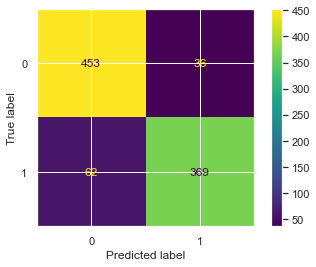

Cross Validation 

:     test_accuracy  test_precision  test_recall   test_f1  test_roc_auc
1        0.904891        0.904255     0.909091  0.906667      0.966614
2        0.896739        0.907104     0.887701  0.897297      0.960853
3        0.907609        0.937143     0.877005  0.906077      0.967264
4        0.875000        0.907514     0.839572  0.872222      0.944870
5        0.915761        0.938202     0.893048  0.915068      0.962242
6        0.932065        0.960227     0.903743  0.931129      0.976497
7        0.888587        0.901099     0.877005  0.888889      0.954294
8        0.872283        0.926829     0.812834  0.866097      0.961592
9        0.915761        0.919355     0.914439  0.916890      0.974651
10       0.945504        0.946237     0.946237  0.946237      0.979104


test_accuracy     0.905420
test_precision    0.924797
test_recall       0.886068
test_f1           0.904657
test_roc_auc      0.964798
dtype: float64


In [186]:
log_reg = LogisticRegression()
log_model = model(df_sampled, log_reg)

### Logistics Regression with GridSearchCV <a class="anchor" id="5.2"></a>

(3679,)
(920,)
X_train : 1856     this is a terrific little set of applications ...
13620    theres no point mentioning the pros with these...
1411     power and layout are the two big advantages to...
4472     navigon has left the gps hardware business and...
44       innovation is a good thing when the point of i...
                               ...                        
2471     its quicken been around for a long time many c...
3368     installed about a year ago without any problem...
856      after tring different partitioning software i ...
1584     i spent about 3 months fighting with the vista...
5714     installation went well but as soon as i get in...
Name: clean_review, Length: 3679, dtype: object


X_train_tdif_vectorizer: (3679, 10000)


X_train_tdif_vectorizer.toarray(): 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


------------------------------------


X

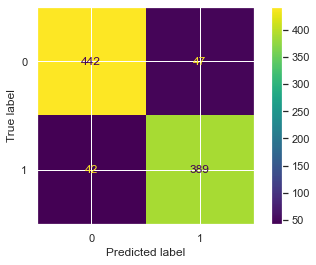

In [195]:
param_grid = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
log_reg_grid = GridSearchCV(log_reg, param_grid,cv=5,verbose=2,scoring="accuracy")
model_Grid(df_sampled,log_reg_grid)

In [196]:
log_reg_grid.best_params_

{'C': 25, 'penalty': 'l2'}

In [211]:
X_train,X_test, y_train, y_test = train_test_split(df_sampled["clean_review"],df_sampled["sentiment"], test_size=0.2, random_state=42)
word_vectorizer = TfidfVectorizer(sublinear_tf=True,
                                      preprocessor=preprocess_text,
                                      strip_accents="unicode",token_pattern=r'\w{1,}',
                                      stop_words="english",
                                      ngram_range = (1,1), max_features=10000)

word_vectorizer.fit(df_sampled["clean_review"])
    
X_train_vectorizer = word_vectorizer.transform(X_train)
X_test_vectorizer = word_vectorizer.transform(X_test)

log_reg_grid.fit(X_train_vectorizer,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.3s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.009, penalty=l1; total time=   0.0s
[CV] END ................................C=0.009

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=2)

In [212]:
summary1 = "A solid overview of Dreamweaver CS5"
summary2 = "Excellent value for the price"
summary3 = "Absolutely the best."
summary4 = "A disappointment"
summary5 = "Complete Rubbish!"
summary6 = "Good introduction to Spanish"
summary7 = "bad feature not recommend"
summary8 = "absoloutely best"
summary9 = "complete rubbish i got this with an acer aspire laptop and installed it there is no shortcut and double clicking the file does nothing all previous versions of office have worked but this is rubbish and the is no manual or proper instructions microsoft had gone way downhill if you can come up with any alternative get that instead"
summary10 = "works great and cant beat the price"
summary11 = "If you have money to waste its the best"
summary12 = "we use this product with family didnt face any problem"
summary13 = "This app is useless cant work without its supplier"
summary14 = "ive been using dreamweaver and its predecessor macromedias ultradev for many years  for someone who is an experienced web designer this course is a highlevel review of the cs5 version of dreamweaver but it doesnt go into a great enough level of detail to find it very useful  on the other hand this is a great tool for someone who is a relative novice at web design  it starts off with a basic overview of html and continues through the concepts necessary to build a modern web site  someone who goes through this course should exit with enough knowledge to create something that does what you want it do dowithin reason  dont expect to go off and build an entire ecommerce system with only this class under your belt  its important to note that theres a long gap from site design to actual implementation  this course teaches you how to implement a design  the user interface and overall user experience is a different subject that isnt covered hereits possible to do a great implementation of an absolutely abysmal design  i speak from experience    as i said above if youre a novice a relative newcomer or just an experienced web designer who wants a refresher course this is a good way to do it"
summary = [summary1,summary2,summary3,summary4,summary5,summary6,summary7,summary8,summary9,summary10,summary11,summary12,summary13,summary14]
summary_df = pd.DataFrame(summary,columns=["test_review"])

In [213]:
summary_vector = word_vectorizer.transform(summary_df.test_review)
result = log_reg_grid.predict(summary_vector)
result_df = pd.DataFrame(result,columns=["prediction"])
pd.concat([summary_df,result_df],axis=1)

test_review  prediction
0                 A solid overview of Dreamweaver CS5           1
1                       Excellent value for the price           1
2                                Absolutely the best.           1
3                                    A disappointment           0
4                                   Complete Rubbish!           0
5                        Good introduction to Spanish           1
6                           bad feature not recommend           0
7                                    absoloutely best           1
8   complete rubbish i got this with an acer aspir...           0
9                 works great and cant beat the price           1
10            If you have money to waste its the best           0
11  we use this product with family didnt face any...           0
12  This app is useless cant work without its supp...           0
13  ive been using dreamweaver and its predecessor...           1

### Decision Tree <a class="anchor" id="5.3"></a>

(3679,)
(920,)
X_train : 1856     this is a terrific little set of applications ...
13620    theres no point mentioning the pros with these...
1411     power and layout are the two big advantages to...
4472     navigon has left the gps hardware business and...
44       innovation is a good thing when the point of i...
                               ...                        
2471     its quicken been around for a long time many c...
3368     installed about a year ago without any problem...
856      after tring different partitioning software i ...
1584     i spent about 3 months fighting with the vista...
5714     installation went well but as soon as i get in...
Name: clean_review, Length: 3679, dtype: object


X_train_tdif_vectorizer: (3679, 10000)


X_train_tdif_vectorizer.toarray(): 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


------------------------------------


X

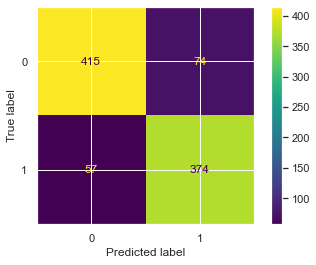

Cross Validation 

:     test_accuracy  test_precision  test_recall   test_f1  test_roc_auc
1        0.872283        0.860825     0.893048  0.876640      0.870742
2        0.850543        0.826733     0.893048  0.858612      0.851301
3        0.853261        0.841026     0.877005  0.858639      0.852867
4        0.836957        0.829016     0.855615  0.842105      0.839011
5        0.847826        0.839378     0.866310  0.852632      0.848111
6        0.875000        0.873016     0.882353  0.877660      0.874878
7        0.853261        0.830846     0.893048  0.860825      0.855438
8        0.839674        0.826531     0.866310  0.845953      0.841138
9        0.869565        0.852792     0.898396  0.875000      0.869087
10       0.858311        0.819048     0.924731  0.868687      0.859383


test_accuracy     0.855668
test_precision    0.839921
test_recall       0.884986
test_f1           0.861675
test_roc_auc      0.856196
dtype: float64


In [171]:
dt_model = DecisionTreeClassifier()
model(df_sampled, dt_model)

### Decision Tree with GridSearchCV <a class="anchor" id="5.4"></a>

(3679,)
(920,)
X_train : 1856     this is a terrific little set of applications ...
13620    theres no point mentioning the pros with these...
1411     power and layout are the two big advantages to...
4472     navigon has left the gps hardware business and...
44       innovation is a good thing when the point of i...
                               ...                        
2471     its quicken been around for a long time many c...
3368     installed about a year ago without any problem...
856      after tring different partitioning software i ...
1584     i spent about 3 months fighting with the vista...
5714     installation went well but as soon as i get in...
Name: clean_review, Length: 3679, dtype: object


X_train_tdif_vectorizer: (3679, 10000)


X_train_tdif_vectorizer.toarray(): 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


------------------------------------


X

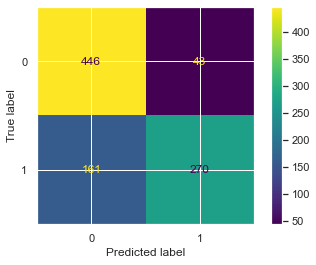

In [179]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth':range(1,10),
              'min_samples_split':range(1,10),
              'min_samples_leaf' : range(1,5)
             
             }
dt_model_grid = GridSearchCV(dt_model, param_grid,cv=5, scoring="accuracy")
model_Grid(df_sampled,dt_model_grid)

In [149]:
dt_model_grid.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

### Random Forest <a class="anchor" id="5.5"></a>

(3679,)
(920,)
X_train : 1856     this is a terrific little set of applications ...
13620    theres no point mentioning the pros with these...
1411     power and layout are the two big advantages to...
4472     navigon has left the gps hardware business and...
44       innovation is a good thing when the point of i...
                               ...                        
2471     its quicken been around for a long time many c...
3368     installed about a year ago without any problem...
856      after tring different partitioning software i ...
1584     i spent about 3 months fighting with the vista...
5714     installation went well but as soon as i get in...
Name: clean_review, Length: 3679, dtype: object


X_train_tdif_vectorizer: (3679, 10000)


X_train_tdif_vectorizer.toarray(): 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


------------------------------------


X

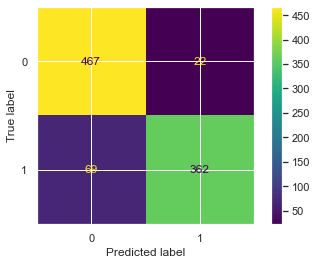

Cross Validation 

:     test_accuracy  test_precision  test_recall   test_f1  test_roc_auc
1        0.904891        0.941860     0.866310  0.902507      0.964871
2        0.877717        0.955128     0.796791  0.868805      0.945771
3        0.885870        0.961783     0.807487  0.877907      0.955772
4        0.880435        0.967320     0.791444  0.870588      0.934736
5        0.904891        0.975000     0.834225  0.899135      0.961577
6        0.896739        0.968553     0.823529  0.890173      0.952906
7        0.861413        0.953333     0.764706  0.848665      0.948592
8        0.891304        0.974194     0.807487  0.883041      0.959745
9        0.875000        0.949045     0.796791  0.866279      0.949198
10       0.926431        0.976048     0.876344  0.923513      0.967356


test_accuracy     0.890469
test_precision    0.962227
test_recall       0.816511
test_f1           0.883061
test_roc_auc      0.954052
dtype: float64


In [178]:
rf_model = RandomForestClassifier(n_estimators=10, max_features="auto",random_state=42)
model(df_sampled, rf_model)

### SVM <a class="anchor" id="5.6"></a>

(3679,)
(920,)
X_train : 1856     this is a terrific little set of applications ...
13620    theres no point mentioning the pros with these...
1411     power and layout are the two big advantages to...
4472     navigon has left the gps hardware business and...
44       innovation is a good thing when the point of i...
                               ...                        
2471     its quicken been around for a long time many c...
3368     installed about a year ago without any problem...
856      after tring different partitioning software i ...
1584     i spent about 3 months fighting with the vista...
5714     installation went well but as soon as i get in...
Name: clean_review, Length: 3679, dtype: object


X_train_tdif_vectorizer: (3679, 10000)


X_train_tdif_vectorizer.toarray(): 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


------------------------------------


X

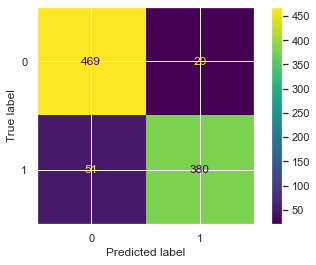

Cross Validation 

:     test_accuracy  test_precision  test_recall   test_f1  test_roc_auc
1        0.937500        0.945652     0.930481  0.938005      0.984046
2        0.926630        0.954545     0.898396  0.925620      0.978019
3        0.921196        0.970238     0.871658  0.918310      0.981712
4        0.899457        0.946429     0.850267  0.895775      0.962153
5        0.948370        0.966667     0.930481  0.948229      0.977221
6        0.942935        0.988235     0.898396  0.941176      0.984592
7        0.918478        0.953757     0.882353  0.916667      0.971785
8        0.896739        0.957055     0.834225  0.891429      0.980885
9        0.942935        0.971591     0.914439  0.942149      0.985996
10       0.959128        0.977654     0.940860  0.958904      0.985282


test_accuracy     0.929337
test_precision    0.963182
test_recall       0.895156
test_f1           0.927626
test_roc_auc      0.979169
dtype: float64


In [172]:
svm_model = SVC()
SVM = model(df_sampled, svm_model)

### SVM with GridSearchCV <a class="anchor" id="5.7"></a>

(3679,)
(920,)
X_train : 1856     this is a terrific little set of applications ...
13620    theres no point mentioning the pros with these...
1411     power and layout are the two big advantages to...
4472     navigon has left the gps hardware business and...
44       innovation is a good thing when the point of i...
                               ...                        
2471     its quicken been around for a long time many c...
3368     installed about a year ago without any problem...
856      after tring different partitioning software i ...
1584     i spent about 3 months fighting with the vista...
5714     installation went well but as soon as i get in...
Name: clean_review, Length: 3679, dtype: object


X_train_tdif_vectorizer: (3679, 10000)


X_train_tdif_vectorizer.toarray(): 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


------------------------------------


X

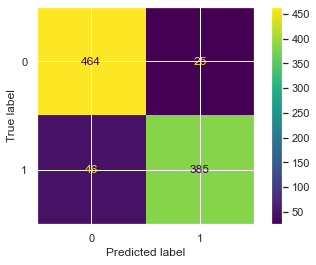

In [174]:
param_grid = {'C': [10], 'gamma': [1],'kernel': ['rbf','linear']}
svm_model_grid = GridSearchCV(svm_model, param_grid,verbose=2, scoring="accuracy")
model_Grid(df_sampled,svm_model_grid)

In [175]:
svm_model_grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [176]:
X_train,X_test, y_train, y_test = train_test_split(df_sampled["clean_review"],df_sampled["sentiment"], test_size=0.2, random_state=42)

#TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency.
word_vectorizer = TfidfVectorizer(sublinear_tf=True,
                                      preprocessor=preprocess_text,
                                      strip_accents="unicode",token_pattern=r'\w{1,}',
                                      stop_words="english",
                                      ngram_range = (1,1), max_features=10000) 
#An n-gram is just a string of n words in a row
#max_features; most frequently to be in its’ vocabulary and drop everything else.


   
    
X_train_vectorizer = word_vectorizer.fit_transform(X_train)

svm_model_grid.fit(X_train_vectorizer,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   8.8s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   8.7s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   9.6s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   8.9s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   8.6s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   5.8s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   5.6s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   5.8s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   5.8s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   6.4s


GridSearchCV(estimator=SVC(),
             param_grid={'C': [10], 'gamma': [1], 'kernel': ['rbf', 'linear']},
             scoring='accuracy', verbose=2)

In [177]:
summary_vector = word_vectorizer.transform(summary_df.test_review)
result = svm_model_grid.predict(summary_vector)
result_df = pd.DataFrame(result,columns=["prediction"])
pd.concat([summary_df,result_df],axis=1)

test_review  prediction
0                 A solid overview of Dreamweaver CS5           1
1                       Excellent value for the price           1
2                                Absolutely the best.           1
3                                    A disappointment           0
4                                   Complete Rubbish!           0
5                        Good introduction to Spanish           1
6                           bad feature not recommend           0
7                                    absoloutely best           1
8   complete rubbish i got this with an acer aspir...           0
9                 works great and cant beat the price           1
10            If you have money to waste its the best           0
11  we use this product with family didnt face any...           0
12  This app is useless cant work without its supp...           0
13  ive been using dreamweaver and its predecessor...           1

### KNN <a class="anchor" id="5.8"></a>

(3679,)
(920,)
X_train : 1856     this is a terrific little set of applications ...
13620    theres no point mentioning the pros with these...
1411     power and layout are the two big advantages to...
4472     navigon has left the gps hardware business and...
44       innovation is a good thing when the point of i...
                               ...                        
2471     its quicken been around for a long time many c...
3368     installed about a year ago without any problem...
856      after tring different partitioning software i ...
1584     i spent about 3 months fighting with the vista...
5714     installation went well but as soon as i get in...
Name: clean_review, Length: 3679, dtype: object


X_train_tdif_vectorizer: (3679, 10000)


X_train_tdif_vectorizer.toarray(): 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


------------------------------------


X

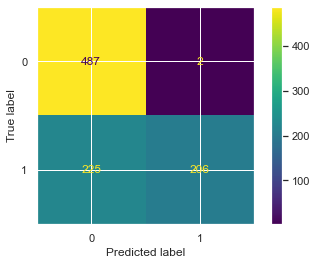

Cross Validation 

:     test_accuracy  test_precision  test_recall   test_f1  test_roc_auc
1        0.725543        0.977778     0.470588  0.635379      0.885411
2        0.701087        0.975309     0.422460  0.589552      0.839321
3        0.711957        1.000000     0.433155  0.604478      0.844920
4        0.722826        0.977528     0.465241  0.630435      0.846175
5        0.725543        0.988636     0.465241  0.632727      0.875883
6        0.684783        0.986301     0.385027  0.553846      0.868334
7        0.722826        1.000000     0.454545  0.625000      0.863636
8        0.720109        0.966667     0.465241  0.628159      0.846722
9        0.728261        0.988764     0.470588  0.637681      0.875676
10       0.716621        0.988095     0.446237  0.614815      0.907295


test_accuracy     0.715956
test_precision    0.984908
test_recall       0.447832
test_f1           0.615207
test_roc_auc      0.865337
dtype: float64


In [180]:
knn_model = KNeighborsClassifier()
model(df_sampled, knn_model)

### Adaboost <a class="anchor" id="5.9"></a>

(3679,)
(920,)
X_train : 1856     this is a terrific little set of applications ...
13620    theres no point mentioning the pros with these...
1411     power and layout are the two big advantages to...
4472     navigon has left the gps hardware business and...
44       innovation is a good thing when the point of i...
                               ...                        
2471     its quicken been around for a long time many c...
3368     installed about a year ago without any problem...
856      after tring different partitioning software i ...
1584     i spent about 3 months fighting with the vista...
5714     installation went well but as soon as i get in...
Name: clean_review, Length: 3679, dtype: object


X_train_tdif_vectorizer: (3679, 10000)


X_train_tdif_vectorizer.toarray(): 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


------------------------------------


X

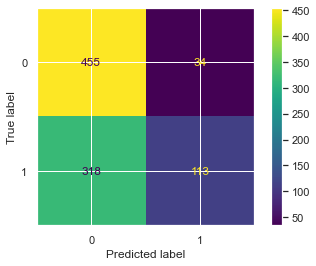

Cross Validation 

:     test_accuracy  test_precision  test_recall   test_f1  test_roc_auc
1        0.565217        0.787234     0.197861  0.316239      0.571306
2        0.557065        0.875000     0.149733  0.255708      0.563817
3        0.576087        0.860465     0.197861  0.321739      0.582356
4        0.576087        0.762712     0.240642  0.365854      0.581647
5        0.586957        0.777778     0.262032  0.392000      0.592342
6        0.570652        0.939394     0.165775  0.281818      0.577363
7        0.540761        0.660714     0.197861  0.304527      0.546444
8        0.597826        0.854545     0.251337  0.388430      0.603569
9        0.586957        0.769231     0.267380  0.396825      0.592253
10       0.569482        0.937500     0.161290  0.275229      0.575120


test_accuracy     0.572709
test_precision    0.822457
test_recall       0.209177
test_f1           0.329837
test_roc_auc      0.578622
dtype: float64


In [181]:
ada_model = AdaBoostClassifier(n_estimators= 1, random_state= 42)
model(df_sampled, ada_model)

### Gradient Boost <a class="anchor" id="5.10"></a>

(3679,)
(920,)
X_train : 1856     this is a terrific little set of applications ...
13620    theres no point mentioning the pros with these...
1411     power and layout are the two big advantages to...
4472     navigon has left the gps hardware business and...
44       innovation is a good thing when the point of i...
                               ...                        
2471     its quicken been around for a long time many c...
3368     installed about a year ago without any problem...
856      after tring different partitioning software i ...
1584     i spent about 3 months fighting with the vista...
5714     installation went well but as soon as i get in...
Name: clean_review, Length: 3679, dtype: object


X_train_tdif_vectorizer: (3679, 10000)


X_train_tdif_vectorizer.toarray(): 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


------------------------------------


X

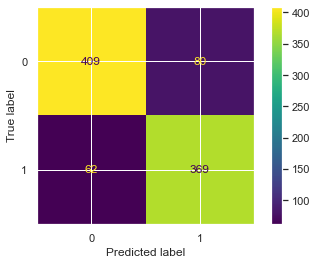

Cross Validation 

:     test_accuracy  test_precision  test_recall   test_f1  test_roc_auc
1        0.847826        0.835897     0.871658  0.853403      0.927069
2        0.836957        0.850829     0.823529  0.836957      0.926522
3        0.864130        0.874317     0.855615  0.864865      0.937897
4        0.855978        0.860215     0.855615  0.857909      0.931914
5        0.850543        0.836735     0.877005  0.856397      0.924188
6        0.894022        0.920455     0.866310  0.892562      0.964827
7        0.836957        0.843243     0.834225  0.838710      0.915207
8        0.834239        0.850000     0.818182  0.833787      0.912090
9        0.853261        0.851852     0.860963  0.856383      0.938769
10       0.871935        0.863874     0.887097  0.875332      0.947707


test_accuracy     0.854585
test_precision    0.858742
test_recall       0.855020
test_f1           0.856630
test_roc_auc      0.932619
dtype: float64


In [182]:
gradient_model = GradientBoostingClassifier(random_state=42)
model(df_sampled, gradient_model)


### XGBoost <a class="anchor" id="5.11"></a>

(3679,)
(920,)
X_train : 1856     this is a terrific little set of applications ...
13620    theres no point mentioning the pros with these...
1411     power and layout are the two big advantages to...
4472     navigon has left the gps hardware business and...
44       innovation is a good thing when the point of i...
                               ...                        
2471     its quicken been around for a long time many c...
3368     installed about a year ago without any problem...
856      after tring different partitioning software i ...
1584     i spent about 3 months fighting with the vista...
5714     installation went well but as soon as i get in...
Name: clean_review, Length: 3679, dtype: object


X_train_tdif_vectorizer: (3679, 10000)


X_train_tdif_vectorizer.toarray(): 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


------------------------------------


X

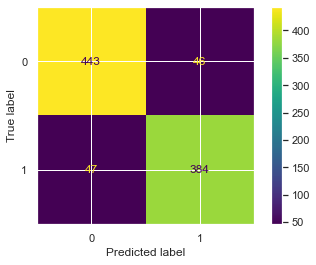

[11:10:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:10:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:10:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:10:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [183]:
xgb_model = XGBClassifier(random_state=42)
model(df_sampled, xgb_model)

### XGBoost with GridSearchCV <a class="anchor" id="5.12"></a>

(3679,)
(920,)
X_train : 1856     this is a terrific little set of applications ...
13620    theres no point mentioning the pros with these...
1411     power and layout are the two big advantages to...
4472     navigon has left the gps hardware business and...
44       innovation is a good thing when the point of i...
                               ...                        
2471     its quicken been around for a long time many c...
3368     installed about a year ago without any problem...
856      after tring different partitioning software i ...
1584     i spent about 3 months fighting with the vista...
5714     installation went well but as soon as i get in...
Name: clean_review, Length: 3679, dtype: object


X_train_tdif_vectorizer: (3679, 10000)


X_train_tdif_vectorizer.toarray(): 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


------------------------------------


X

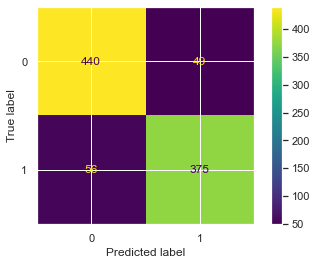

In [184]:
xgb_grid_model = XGBClassifier(random_state=42)
param_grid = {"n_estimators":[100,300],"max_depth":[3,5,6],"learning_rate":[0.01,0.1],
              "subsample":[0.5,1],"colsample_bytree":[0.5,1]}
xgb_grid = GridSearchCV(xgb_model,param_grid,scoring="f1",verbose=2,n_jobs=-1)
model_Grid(df_sampled, xgb_grid)

In [216]:
X_train,X_test, y_train, y_test = train_test_split(df_sampled["clean_review"],df_sampled["sentiment"], test_size=0.2, random_state=42)
word_vectorizer = TfidfVectorizer(sublinear_tf=True,
                                      preprocessor=preprocess_text,
                                      strip_accents="unicode",token_pattern=r'\w{1,}',
                                      stop_words="english",
                                      ngram_range = (1,1), max_features=10000)

   
word_vectorizer.fit(df_sampled["clean_review"])
    
X_train_vectorizer = word_vectorizer.transform(X_train)
X_test_vectorizer = word_vectorizer.transform(X_test)

log_reg.fit(X_train_vectorizer,y_train)
y_pred = log_reg.predict(X_test_vectorizer)
log_reg_F1 = f1_score(y_test, y_pred)
log_reg_recall = recall_score(y_test, y_pred)
log_reg_auc = roc_auc_score(y_test, y_pred)
#------#
log_reg_grid.fit(X_train_vectorizer,y_train)
y_pred = log_reg_grid.predict(X_test_vectorizer)
log_reg_grid_F1 = f1_score(y_test, y_pred)
log_reg_grid_recall = recall_score(y_test, y_pred)
log_reg_grid_auc = roc_auc_score(y_test, y_pred)
#------#
dt_model.fit(X_train_vectorizer,y_train)
y_pred = dt_model.predict(X_test_vectorizer)
dt_model_F1 = f1_score(y_test, y_pred)
dt_model_recall = recall_score(y_test, y_pred)
dt_model_auc = roc_auc_score(y_test, y_pred)
#------#
dt_model_grid.fit(X_train_vectorizer,y_train)
y_pred = dt_model_grid.predict(X_test_vectorizer)
dt_model_grid_F1 = f1_score(y_test, y_pred)
dt_model_grid_recall = recall_score(y_test, y_pred)
dt_model_grid_auc = roc_auc_score(y_test, y_pred)
#------#
svm_model.fit(X_train_vectorizer,y_train)
y_pred = svm_model.predict(X_test_vectorizer)
svm_model_F1 = f1_score(y_test, y_pred)
svm_model_recall = recall_score(y_test, y_pred)
svm_model_auc = roc_auc_score(y_test, y_pred)
#------#
svm_model_grid.fit(X_train_vectorizer,y_train)
y_pred = svm_model_grid.predict(X_test_vectorizer)
svm_model_grid_F1 = f1_score(y_test, y_pred)
svm_model_grid_recall = recall_score(y_test, y_pred)
svm_model_grid_auc = roc_auc_score(y_test, y_pred)
#------#
rf_model.fit(X_train_vectorizer,y_train)
y_pred = rf_model.predict(X_test_vectorizer)
rf_model_F1 = f1_score(y_test, y_pred)
rf_model_recall = recall_score(y_test, y_pred)
rf_model_auc = roc_auc_score(y_test, y_pred)
#------#
knn_model.fit(X_train_vectorizer,y_train)
y_pred = knn_model.predict(X_test_vectorizer)
knn_model_F1 = f1_score(y_test, y_pred)
knn_model_recall = recall_score(y_test, y_pred)
knn_model_auc = roc_auc_score(y_test, y_pred)
#------#
ada_model.fit(X_train_vectorizer,y_train)
y_pred = ada_model.predict(X_test_vectorizer)
ada_model_F1 = f1_score(y_test, y_pred)
ada_model_recall = recall_score(y_test, y_pred)
ada_model_auc = roc_auc_score(y_test, y_pred)
#------#
gradient_model.fit(X_train_vectorizer,y_train)
y_pred = gradient_model.predict(X_test_vectorizer)
gradient_model_F1 = f1_score(y_test, y_pred)
gradient_model_recall = recall_score(y_test, y_pred)
gradient_model_auc = roc_auc_score(y_test, y_pred)
#------#
xgb_model.fit(X_train_vectorizer,y_train)
y_pred = xgb_model.predict(X_test_vectorizer)
xgb_model_F1 = f1_score(y_test, y_pred)
xgb_model_recall = recall_score(y_test, y_pred)
xgb_model_auc = roc_auc_score(y_test, y_pred)
#------#
xgb_grid_model.fit(X_train_vectorizer,y_train)
y_pred = xgb_grid_model.predict(X_test_vectorizer)
xgb_grid_model_F1 = f1_score(y_test, y_pred)
xgb_grid_model_recall = recall_score(y_test, y_pred)
xgb_grid_model_auc = roc_auc_score(y_test, y_pred)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.009, penalty=l1; total time=   0.0s
[CV] END ................................C=0.009

In [228]:
df.to_csv("binary_sentiment.csv", index = False)

## Deep Learning <a class="anchor" id="6"></a>

In [229]:
import tensorflow
from tensorflow.python.keras import models, layers, optimizers
from tensorflow.python.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, GRU, Embedding


In [230]:
df_deepl = pd.read_csv("binary_sentiment.csv")

In [231]:
df_deepl = df_deepl[["clean_review","sentiment"]]
df_deepl.head(78)

clean_review  sentiment
0   ive been using dreamweaver and its predecessor...          1
1   the demo is done with the pc version with refe...          1
2   if youve been wanting to learn how to create y...          1
3   ive been creating websites with dreamweaver fo...          1
4   i decided after trying a number of other produ...          1
..                                                ...        ...
73  i have nolo products i bought in the past and ...          0
74  this is the third version of quicken willmaker...          1
75  i have to say that this software is great to s...          1
76  this product is quite easy to install and simp...          1
77  if youre like us you thought about getting som...          1

[78 rows x 2 columns]

In [232]:
df_deepl.shape

(14102, 2)

In [233]:
df_deepl.isna().sum()

clean_review    2
sentiment       0
dtype: int64

In [234]:
df_deepl.dropna(subset=["clean_review"],inplace=True)

In [235]:
df_deepl.sentiment.value_counts()

1    11779
0     2321
Name: sentiment, dtype: int64

In [236]:
df_0 = df.loc[df.sentiment == 0].head(2300)
df_1 = df.loc[df.sentiment == 1].head(2300)
frames = [df_0, df_1]
df_sampled_deepl = pd.concat(frames)

In [237]:
df_sampled_deepl = df_sampled_deepl[["clean_review","sentiment"]]#.reset_index(drop=True)

In [238]:
df_sampled_deepl

clean_review  sentiment
21    excel does not allow you to copy and paste som...          0
23    been using office for over twenty years  still...          0
35    complete rubbish i got this with an acer aspir...          0
39    when i try to install i receive error code 300...          0
67    i just couldnt get to grips with this software...          0
...                                                 ...        ...
2682  anyone knows that can i buy two of this one as...          1
2683                   great product  cheap and durable          1
2684                   great product  cheap and durable          1
2685                works great and cant beat the price          1
2686                works great and cant beat the price          1

[4600 rows x 2 columns]

In [239]:
df_sampled_deepl.clean_review=df_sampled_deepl.clean_review.astype(str)
#It seems that column "content" not only contains strings but also other values like floats to which you cannot apply the basic mehthod.
#converted the entire column to strings first, which would be more efficient. 

In [240]:
def tokens_first_look(x):
    tokens_number = [len(tokens) for tokens in x]
    tokens_number = np.array(tokens_number)
    print(f'Number of Text : {len(tokens_number)}')
    print(f'Mean of Number of Tokens : {tokens_number.mean()}')
    print(f'Maximum of Number of Tokens : {tokens_number.max()}') #Length of text which contains max text
    print(f'Minimum of Number of Tokens : {tokens_number.min()}')
    print(f'Argmax of Text: {tokens_number.argmax()}') # Index of max text
    print(f'Argmin of Text : {tokens_number.argmin()}') # Index of min text
  

In [243]:
tokens_first_look(X)

Number of Text : 4600
Mean of Number of Tokens : 170.4945652173913
Maximum of Number of Tokens : 3723
Minimum of Number of Tokens : 0
Argmax of Text: 1235
Argmin of Text : 1450


### Tokenization <a class="anchor" id="6.1"></a>

In [242]:
max_feat= 12000 #seting max features to define max number of tokenizer words
tokenizer = Tokenizer(num_words=max_feat) 
tokenizer.fit_on_texts(df_sampled_deepl['clean_review'].values)
X = tokenizer.texts_to_sequences(df_sampled_deepl['clean_review'].values)  #converted to list


### Padding <a class="anchor" id="6.2"></a>

In [244]:
# pad_sequences is used to ensure that all sequences in a list have the same length
max_len = max(len(i) for i in X)
X = pad_sequences(X,maxlen=max_len)

###  Model Preperation <a class="anchor" id="6.3"></a>

In [246]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [247]:
model = Sequential()
model.add(Embedding(max_feat, 128, input_length = X.shape[1])) 
#Embedding layer enables us to convert each word into a fixed length vector of defined size
model.add(SpatialDropout1D(0.4))
#same function as Dropout, however, it drops entire 1D feature maps instead of individual elements
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
#recurrent dropout has a regularizing effect and can prevent overfitting.
#unlike regular dropout, does not have its own layer:
model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 3723, 128)         1536000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 3723, 128)        0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 176)               214720    
                                                                 
 dense (Dense)               (None, 1)                 177       
                                                                 
Total params: 1,750,897
Trainable params: 1,750,897
Non-trainable params: 0
_________________________________________________________________
None


In [248]:
y = df_sampled_deepl['sentiment'].values
#y=pd.get_dummies(df_sampled_deepl_label['sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

### LSTM Model <a class="anchor" id="6.4"></a>

In [235]:
batch_size=128
model.fit(X_train, y_train, epochs = 2, batch_size=batch_size, verbose = 'auto')

Epoch 1/2
26/26 [==============================] - 17609s 684s/step - loss: 0.6610 - accuracy: 0.6224
Epoch 2/2
26/26 [==============================] - 22230s 859s/step - loss: 0.4943 - accuracy: 0.8025


In [225]:
from keras.models import load_model
#model.save("finalized_model_2.h5")
loaded_model = load_model("finalized_model_2.h5")

###  Model Evaluation <a class="anchor" id="6.5"></a>

In [267]:
loss, accuracy = loaded_model.evaluate(X_train, y_train)

101/101 [==============================] - 388s 4s/step - loss: 0.2926 - accuracy: 0.9124


In [249]:
loss, accuracy = loaded_model.evaluate(X_test, y_test)

44/44 [==============================] - 170s 4s/step - loss: 0.3762 - accuracy: 0.8623


###  Prediction <a class="anchor" id="6.6"></a>

In [261]:
tokens = tokenizer.texts_to_sequences(summary_df.test_review) 

In [262]:
tokens

[[5, 748, 3987, 7, 1698, 2743],
 [487, 856, 12, 1, 188],
 [625, 1, 217],
 [5, 2334],
 [457, 6456],
 [80, 2040, 2, 1100],
 [249, 251, 18, 206],
 [217],
 [457,
  6456,
  4,
  172,
  11,
  14,
  32,
  5890,
  289,
  3,
  157,
  6,
  52,
  8,
  47,
  6457,
  3,
  1810,
  1524,
  1,
  170,
  92,
  255,
  26,
  247,
  220,
  7,
  77,
  15,
  258,
  19,
  11,
  8,
  6456,
  3,
  1,
  8,
  47,
  698,
  25,
  2351,
  736,
  85,
  43,
  864,
  110,
  5428,
  24,
  9,
  33,
  356,
  45,
  14,
  75,
  1398,
  51,
  10,
  293],
 [132, 101, 3, 146, 1580, 1, 188],
 [24, 9, 15, 156, 2, 921, 37, 1, 217],
 [153, 49, 11, 46, 14, 555, 179, 1552, 75, 124],
 [11, 797, 8, 496, 146, 71, 165, 37, 6764],
 [119,
  70,
  88,
  1698,
  3,
  37,
  3344,
  8590,
  12,
  93,
  97,
  12,
  427,
  109,
  8,
  32,
  891,
  339,
  3026,
  11,
  421,
  8,
  5,
  221,
  7,
  1,
  2743,
  55,
  7,
  1698,
  19,
  6,
  180,
  123,
  107,
  5,
  101,
  244,
  601,
  7,
  1642,
  2,
  112,
  6,
  64,
  574,
  16,
  1,
  59,
  

In [263]:
tokens_pad = pad_sequences(tokens, max_len)
tokens_pad.shape

(14, 3723)

In [265]:
modelpred = loaded_model.predict(tokens_pad)
modelpred

array([[0.6638498 ],
       [0.84933853],
       [0.6290197 ],
       [0.5163069 ],
       [0.5207479 ],
       [0.7093378 ],
       [0.41000333],
       [0.59080005],
       [0.57406133],
       [0.9342981 ],
       [0.43759736],
       [0.4152179 ],
       [0.4185243 ],
       [0.6970064 ]], dtype=float32)

In [ ]:
df["clean_review"]=df["clean_review"].astype(str)

In [242]:
df_pred = pd.DataFrame(modelpred, index=summary)
df_pred.rename(columns={0: 'Prediction'}, inplace=True)

In [246]:
df_pred["Predicted_Rate"] = df_pred["Prediction"].apply(lambda x: 1 if x>=0.6 else 0)

In [247]:
df_pred

Prediction  Predicted_Rate
A solid overview of Dreamweaver CS5                   0.663850               1
Excellent value for the price                         0.849339               1
Absolutely the best.                                  0.629020               1
A disappointment                                      0.516307               0
Complete Rubbish!                                     0.520748               0
Good introduction to Spanish                          0.709338               1
bad feature not recommend                             0.410003               0
absoloutely best                                      0.590800               0
complete rubbish i got this with an acer aspire...    0.574061               0
works great and cant beat the price                   0.934298               1
If you have money to waste its the best               0.437597               0
we use this product with family didnt face any ...    0.415218               0
This app is useless cant work without its supplier    0.418524               0
ive been using dreamweaver and its predecessor ...    0.697006               1

## Model Comparison

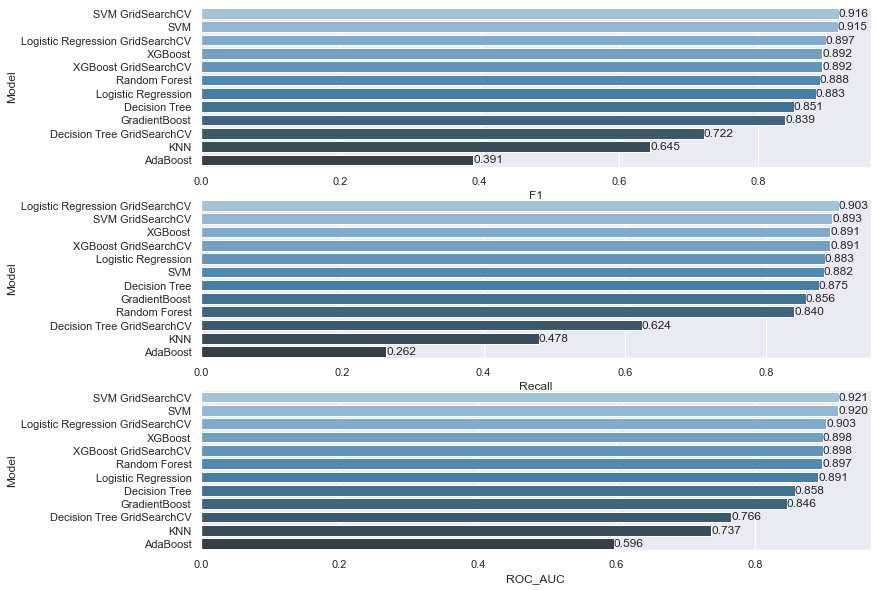

In [224]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "Logistic Regression GridSearchCV",
                                  "Decision Tree", "Decision Tree GridSearchCV",
                                  "SVM", "SVM GridSearchCV",
                                  "Random Forest",
                                  "KNN",
                                  "AdaBoost","GradientBoost", 
                                  "XGBoost","XGBoost GridSearchCV"],
                        "F1": [log_reg_F1,log_reg_grid_F1,
                               dt_model_F1,dt_model_grid_F1,
                               svm_model_F1,svm_model_grid_F1,
                               rf_model_F1,
                               knn_model_F1,
                               ada_model_F1,
                               gradient_model_F1,
                               xgb_model_F1,xgb_grid_model_F1],
                        "Recall":[log_reg_F1,log_reg_grid_recall,
                               dt_model_recall,dt_model_grid_recall,
                               svm_model_recall,svm_model_grid_recall,
                               rf_model_recall,
                               knn_model_recall,
                               ada_model_recall,
                               gradient_model_recall,
                               xgb_model_recall,xgb_grid_model_recall],
                        "ROC_AUC": [log_reg_auc,log_reg_grid_auc,
                               dt_model_auc,dt_model_grid_auc,
                               svm_model_auc,svm_model_grid_auc,
                               rf_model_auc,
                               knn_model_auc,
                               ada_model_auc,
                               gradient_model_auc,
                               xgb_model_auc,xgb_grid_model_auc]})
def labels(ax):
    for p in ax.patches:
        width = p.get_width()                    
        ax.text(width,                              
                p.get_y() + p.get_height() / 2,     
                '{:1.3f}'.format(width),            
                ha = 'left',                       
                va = 'center')                       
plt.figure(figsize=(12,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.subplot(313)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

## CONCLUSION <a class="anchor" id="7"></a>

* In this project, Amazon Software Products Reviews were analyzed.
* As to the result of EDA processing, it can be seen that positive comments are more than negative comments.
* In addition, verified reviews were also analyzed. It is clear that nearly 42 percent of reviews weren't verified. 
* Furthermore, analyzes were carried out taking into account the dates on which the comments were made. 
* As a result, customers had made more comments in winter than summer.
* In addition, there were more comments made in the middle of the month.
* On the other hand, binary classification was formed and ML algorithms were used for classification. 
* As to classification scores SVC and Logistic Regression algorithms were more succesfull than other algorithms. 
* In addition, known as a LSTM deep learning model also was applied however it didn't outperform ML algorithms although it run almost ten hours to fit the model. 
* In future studies, deep learning models can be developed further. Better results can be obtained by increasing the epoch numbers in deep learning models. 
* In a further dimension, sentiment analysis can be performed using transformer models, which give very good results.